In [1]:
%reload_ext autoreload
%autoreload 2

import os
import argparse
import sys
import time

import numpy as np
from multiprocess import Pool

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

%matplotlib inline

Setting environment for Precision WorkStation


No vtk
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
atlas_spec = dict(name='atlasV6',
                   vol_type='score'    ,               
                    resolution='10.0um'
                   )

In [3]:
atlas_structures_wrt_canonicalAtlasSpace_atlasResol = \
DataManager.load_original_volume_all_known_structures_v3(atlas_spec, in_bbox_wrt='canonicalAtlasSpace',
                                                        out_bbox_wrt='canonicalAtlasSpace')

Prior structure/index map not found. Generating a new one.


In [4]:
# stack = 'CHATM3'
stack = 'MD593'

In [5]:
T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol = bp.unpack_ndarray_file('/home/yuncong/' + stack + '_T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.bp')

In [6]:
registered_atlas_structures_wrt_wholebrainWithMargin_atlasResol = \
{name_s: transform_volume_v4(volume=vo, transform=T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol, return_origin_instead_of_bbox=True)
for name_s, vo in atlas_structures_wrt_canonicalAtlasSpace_atlasResol.iteritems()}

/home/yuncong/Brain/utilities/registration_utilities.py:1562: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(volume_m_aligned_to_f.dtype, np.float):
Interpolating/filling sparse volume: 0.07 seconds.
Interpolating/filling sparse volume: 0.34 seconds.
Interpolating/filling sparse volume: 0.09 seconds.
Interpolating/filling sparse volume: 0.06 seconds.
Interpolating/filling sparse volume: 0.02 seconds.
Interpolating/filling sparse volume: 0.13 seconds.
Interpolating/filling sparse volume: 0.13 seconds.
Interpolating/filling sparse volume: 0.06 seconds.
Interpolating/filling sparse volume: 0.02 seconds.
Interpolating/filling sparse volume: 0.20 seconds.
Interpolating/filling sparse volume: 0.34 seconds.
Interpolating/filling sparse volume: 0.09 seconds.
Interpolating/filling sparse volume: 0.07 seconds.
Interpolating/filling sparse volume: 

In [7]:
# Define volume ROI for which to compute scores based on outline registered atlas.

In [8]:
registered_atlas_structures_bbox_wrt_wholebrainWithMargin_atlasResol = \
{name_s: (o[0], o[0] + v.shape[1] - 1, o[1], o[1] + v.shape[0] - 1, o[2], o[2] + v.shape[2] - 1)
 for name_s, (v, o) in registered_atlas_structures_wrt_wholebrainWithMargin_atlasResol.iteritems()}

In [9]:
registered_atlas_structures_bbox_wrt_wholebrainWithMargin_atlasResol

{'10N_L': (1345, 1484, 517, 595, 384, 436),
 '10N_R': (1345, 1484, 517, 595, 443, 495),
 '12N': (1340, 1472, 528, 601, 396, 481),
 '3N_L': (1011, 1076, 415, 455, 411, 439),
 '3N_R': (1011, 1076, 415, 455, 440, 468),
 '4N_L': (1071, 1092, 423, 448, 405, 425),
 '4N_R': (1071, 1092, 423, 448, 454, 474),
 '5N_L': (1111, 1191, 485, 578, 273, 331),
 '5N_R': (1111, 1191, 485, 578, 548, 606),
 '6N_L': (1198, 1226, 519, 546, 390, 415),
 '6N_R': (1198, 1226, 519, 546, 464, 489),
 '7N_L': (1190, 1295, 595, 681, 277, 370),
 '7N_R': (1190, 1295, 595, 681, 509, 602),
 '7n_L': (1145, 1245, 511, 630, 261, 410),
 '7n_R': (1145, 1245, 511, 630, 469, 618),
 'AP': (1364, 1435, 501, 544, 421, 463),
 'Amb_L': (1290, 1360, 594, 628, 309, 322),
 'Amb_R': (1290, 1360, 594, 628, 557, 570),
 'DC_L': (1191, 1336, 432, 524, 179, 325),
 'DC_R': (1191, 1336, 432, 524, 554, 700),
 'IC': (1033, 1232, 184, 394, 262, 611),
 'LC_L': (1139, 1232, 431, 509, 341, 371),
 'LC_R': (1139, 1232, 431, 509, 508, 538),
 'LRt_L': (1

In [10]:
registered_atlas_structures_xyzTwoCorners_wrt_wholebrainWithMargin_atlasResol = \
{name_s: ((o[0], o[2], o[4]), (o[1], o[3], o[5]))
for name_s, o in registered_atlas_structures_bbox_wrt_wholebrainWithMargin_atlasResol.iteritems()}

In [11]:
registered_atlas_structures_xyzCorners_wrt_wholebrainWithMargin_atlasResol = \
{name_s: ((o[0], o[2], o[4]), (o[0], o[2], o[5]), (o[0], o[3], o[4]), (o[0], o[3], o[5]), \
         (o[1], o[2], o[4]), (o[1], o[2], o[5]), (o[1], o[3], o[4]), (o[1], o[3], o[5]))
for name_s, o in registered_atlas_structures_bbox_wrt_wholebrainWithMargin_atlasResol.iteritems()}

In [12]:
from data_manager import CoordinatesConverter

In [13]:
converter = CoordinatesConverter(stack=stack)

In [14]:
# registered_atlas_structures_wrt_wholebrainXYcropped_xysec = {}

# for name_s, corners_xyz in registered_atlas_structures_xyzCorners_wrt_wholebrainWithMargin_atlasResol.iteritems():
# #     print name_s
#     registered_atlas_structures_wrt_wholebrainXYcropped_xysec[name_s] = \
#     converter.convert_frame_and_resolution(p=corners_xyz, 
#                                        in_wrt=('wholebrainWithMargin', 'sagittal'),
#                                       in_resolution='10.0um',
#                                       out_wrt=('wholebrainXYcropped', 'sagittal'),
#                                       out_resolution='image_image_section').astype(np.int)

In [15]:
registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners = {}

for name_s, corners_xyz in registered_atlas_structures_xyzTwoCorners_wrt_wholebrainWithMargin_atlasResol.iteritems():
#     print name_s
    registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[name_s] = \
    converter.convert_frame_and_resolution(p=corners_xyz, 
                                       in_wrt=('wholebrainWithMargin', 'sagittal'),
                                      in_resolution='10.0um',
                                      out_wrt=('wholebrainXYcropped', 'sagittal'),
                                      out_resolution='image_image_section').astype(np.int)

In [16]:
save_json(registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners, 
          '/home/yuncong/' + stack + '_registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners.json')

In [15]:
# registered_atlas_structures_wrt_wholebrainWithMargin_section_limits = {}

# for name_s, b in registered_atlas_structures_bbox_wrt_wholebrainWithMargin_atlasResol.iteritems():
# #     print name_s
#     registered_atlas_structures_wrt_wholebrainWithMargin_section_limits[name_s] = \
#     converter.convert_frame_and_resolution(p=[[np.nan, np.nan, b[4]], [np.nan, np.nan, b[5]]], 
#                                        in_wrt=('wholebrainWithMargin', 'sagittal'),
#                                       in_resolution='10.0um',
#                                       out_wrt='wholebrain',
#                                       out_resolution='image_image_section')[:,2].astype(np.int)

In [35]:
# registered_atlas_structures_wrt_wholebrainWithMargin_section_limits

In [36]:
# save_json(registered_atlas_structures_wrt_wholebrainWithMargin_section_limits, 
#           '/home/yuncong/' + stack + '_structure_section_limits.json')

In [17]:
batch_size = 256
model_dir_name = 'inception-bn-blue'
model_name = 'inception-bn-blue'
model, mean_img = load_mxnet_model(model_dir_name=model_dir_name, model_name=model_name, 
                                   num_gpus=1, batch_size=batch_size)

/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:53: UserWarning: You created Module with Module(..., label_names=['softmax_label']) but input with name 'softmax_label' is not found in symbol.list_arguments(). Did you mean one of:
	data
  warnings.warn(msg)
/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:65: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


In [18]:
# out_resolution_um = 10.
# out_resolution_str = '%.1fum' % out_resolution_um

detector_id = 15 # For CSHL nissl data. e.g. MD593
# detector_id = 799 # For UCSD neurotrace data, e.g. CHATM2, CHATM3

# print 'input_version:', detector_settings.loc[detector_id]['input_version']

In [19]:
# detector_setting = {}
# detector_setting['feature_classifier_id'] = 899
# detector_setting['windowing_id'] = 7

detector_setting = detector_settings.loc[detector_id]

In [20]:
clfs = DataManager.load_classifiers(classifier_id=detector_setting['feature_classifier_id'])

In [21]:
win_id = detector_setting['windowing_id']

In [25]:
motor_nuclei = ['Amb', '3N', '4N', '5N', '6N', '7N', '10N', '12N']

[autoreload of utilities2015 failed: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
AttributeError: __abstractmethods__
]


In [23]:
# output_resolution = '10.0um'

In [26]:
# for stack in ['CHATM2', 'CHATM3']:
for stack in ['MD593']:
    
    output_resolution = '10.0um'
    out_resolution_um = convert_resolution_string_to_um(resolution=output_resolution, stack=stack)
    
    registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners = \
load_json('/home/yuncong/' + stack + '_registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners.json')

    ######## Identify ROI based on simple global alignment ########

    registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection = defaultdict(dict)

    section_margin_um = 500.
    section_margin = int(section_margin_um / SECTION_THICKNESS)
    
#     image_margin_um = 500.
    image_margin_um = 1000.
    image_margin = int(np.round(image_margin_um / convert_resolution_string_to_um('raw', stack)))

    valid_secmin = np.min(metadata_cache['valid_sections'][stack])
    valid_secmax = np.max(metadata_cache['valid_sections'][stack])

    # for name_u in all_known_structures:
    for name_u in motor_nuclei:
    # for name_u in ['RtTg', 'VCA', 'AP', 'Tz', 'LC', 'Sp5O', '7n', 'SNC', 'Sp5I', 'DC', 'Sp5C', 'VCP', 'RMC', 'PBG', 'SNR', 'LRt', 'SC', 'IC', 'Pn', 'VLL']:

        if name_u in singular_structures:

            (xmin, ymin, secmin), (xmax, ymax, secmax) = registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[name_u]

            for sec in range(max(secmin - section_margin, valid_secmin), min(secmax + 1 + section_margin, valid_secmax)):

                if is_invalid(sec=sec, stack=stack):
                    continue

                registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection[name_u][sec] = \
                (max(xmin - image_margin, 0), 
                 xmax + image_margin, 
                 max(ymin - image_margin, 0), 
                 ymax + image_margin)
        else:

            a = defaultdict(list)

            lname = convert_to_left_name(name_u)        
            (xmin, ymin, secmin), (xmax, ymax, secmax) = registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[lname]

            for sec in range(max(secmin - section_margin, valid_secmin), min(secmax + 1 + section_margin, valid_secmax)):

                if is_invalid(sec=sec, stack=stack):
                    continue

                a[sec].append((max(xmin - image_margin, 0), 
                 xmax + image_margin, 
                 max(ymin - image_margin, 0), 
                 ymax + image_margin))

            rname = convert_to_right_name(name_u)
            (xmin, ymin, secmin), (xmax, ymax, secmax) = registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[rname]

            for sec in range(max(secmin - section_margin, valid_secmin), min(secmax + 1 + section_margin, valid_secmax)):

                if is_invalid(sec=sec, stack=stack):
                    continue

                a[sec].append((max(xmin - image_margin, 0), 
                 xmax + image_margin, 
                 max(ymin - image_margin, 0), 
                 ymax + image_margin))

            for sec, bboxes in a.iteritems():
                if len(bboxes) == 1:
                    registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection[name_u][sec] = bboxes[0]
                else:
                    xmin, ymin = np.min(bboxes, axis=0)[[0,2]]
                    xmax, ymax = np.max(bboxes, axis=0)[[1,3]]
                    registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection[name_u][sec] = (xmin, xmax, ymin, ymax)
                    
                    
    ######### Generate score maps ###########
                    
#     for name_u in all_known_structures:
    for name_u in motor_nuclei:
        if name_u == '7N': continue            
#     for name_u in ['7N']:
# for name_u in ['RtTg', 'VCA', 'AP', 'Tz', 'LC', 'Sp5O', '7n', 'SNC', 'Sp5I', 'DC', 'Sp5C', 'VCP', 'RMC', 'PBG', 'SNR', 'LRt', 'SC', 'IC', 'Pn', 'VLL']:
            
        for sec, bbox in sorted(registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection[name_u].items()):

    #         if is_invalid(sec=sec, stack=stack):
    #             continue

            print name_u, sec

            viz_all_landmarks, scoremap_all_landmarks = \
            draw_scoremap(clfs={name_u: clfs[name_u]}, 
                                  bbox=bbox,
                            scheme='none', 
                        win_id=win_id, prep_id=2,
                        stack=stack, return_scoremap=True, sec=sec,
                        model=model, model_name=model_name,
                         mean_img=mean_img, 
                         batch_size=batch_size,
                          output_patch_size=224,
                          is_nissl=False,
                       out_resolution_um=out_resolution_um,
                    image_shape=metadata_cache['image_shape'][stack],
                                  return_wholeimage=True)

            sm = scoremap_all_landmarks[name_u]
            viz = viz_all_landmarks[name_u]

            scoremap_bp_filepath = \
            DataManager.get_downscaled_scoremap_filepath(stack=stack, section=sec, 
                                                         structure=name_u,
                                                         detector_id=detector_id,
                                                         out_resolution_um=out_resolution_um)
            save_data(sm.astype(np.float16), scoremap_bp_filepath, upload_s3=False)

            viz_filepath = \
            DataManager.get_scoremap_viz_filepath_v2(stack=stack, section=sec, 
                                                         structure=name_u,
                                                         detector_id=detector_id,
                                                         out_resolution=output_resolution)
            save_data(viz, viz_filepath, upload_s3=False)

            del viz_all_landmarks, scoremap_all_landmarks
        
    ######### Generate score volumes ##########
        
#     for structure in ['7N']:
    for structure in motor_nuclei:
        if name_u == '7N': continue

        for name_s in [convert_to_left_name(structure), convert_to_right_name(structure)]:

            scoremaps = {}

    #         for sec in metadata_cache['valid_sections'][stack]:

            (xmin, ymin, s1), (xmax, ymax, s2) = registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[name_s]

            for sec in range(max(s1 - section_margin, metadata_cache['section_limits'][stack][0]), 
                             min(s2 + 1 + section_margin, metadata_cache['section_limits'][stack][1])):

                if is_invalid(sec=sec, stack=stack):
                    continue

                scoremap = DataManager.load_downscaled_scoremap(stack=stack, section=sec, structure=structure, 
                                                                prep_id='alignedBrainstemCrop',
                                                              out_resolution_um=out_resolution_um, 
                                                                detector_id=detector_id).astype(np.float32)

                mask = DataManager.load_image_v2(stack=stack, section=sec, 
                                     prep_id='alignedBrainstemCrop', 
                                     resol='thumbnail', version='mask')

                mask_outResol = rescale_by_resampling(mask, new_shape=(scoremap.shape[1], scoremap.shape[0]))

                scoremap[~mask_outResol] = 0
                scoremaps[sec] = scoremap

            volume_outVolResol, volume_origin_wrt_wholebrainXYcropped_outVolResol = \
            images_to_volume_v2(images=scoremaps, spacing_um=20.,
                                    in_resol_um=out_resolution_um,
                                    out_resol_um=out_resolution_um)
            print volume_outVolResol.shape

            brain_spec = dict(name=stack,
                           vol_type='score',
                            detector_id=detector_id,
                           resolution=output_resolution)

            # Save volume and origin.

            save_data(volume_outVolResol.astype(np.float16), \
                      DataManager.get_original_volume_filepath_v2(stack_spec=brain_spec, structure=name_s))

            wholebrainXYcropped_origin_wrt_wholebrain_outVolResol = \
            DataManager.get_domain_origin(stack=stack, domain='wholebrainXYcropped', 
                                          resolution=output_resolution)
            volume_origin_wrt_wholebrain_outVolResol =\
            volume_origin_wrt_wholebrainXYcropped_outVolResol + wholebrainXYcropped_origin_wrt_wholebrain_outVolResol

            save_data(volume_origin_wrt_wholebrain_outVolResol,
                      DataManager.get_original_volume_origin_filepath_v3(stack_spec=brain_spec, structure=name_s, wrt='wholebrain'))

            # Compute gradients.

            gradients = compute_gradient_v2((volume_outVolResol, volume_origin_wrt_wholebrain_outVolResol), 
                                            smooth_first=True)

            DataManager.save_volume_gradients(gradients, stack_spec=brain_spec, structure=name_s)

Amb 130


locate patches: 0.02 seconds
Load pre-computed features: 0.02 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC23-2015.08.25-15.25.09_MD593_2_0068_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.20 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image Amb: 0.13 seconds


(564, 786, 3) (564, 786)
Amb 131


locate patches: 0.01 seconds
Load pre-computed features: 0.03 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N23-2015.08.21-17.48.50_MD593_3_0069_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.19 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
Amb 132


Generate scoremap overlay image Amb: 0.14 seconds
locate patches: 0.01 seconds
Load pre-computed features: 0.02 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0069_prep2_lossless_grayJpeg.jpg


Load background image: 1.40 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 133


Generate scoremap overlay image Amb: 0.13 seconds
locate patches: 0.01 seconds
Load pre-computed features: 0.02 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N24-2015.08.21-17.52.55_MD593_1_0070_prep2_lossless_grayJpeg.jpg


Load background image: 1.42 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 134


Generate scoremap overlay image Amb: 0.13 seconds
locate patches: 0.01 seconds
Load pre-computed features: 0.02 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC24-2015.08.25-15.30.48_MD593_1_0070_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 135


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.02 seconds
Load pre-computed features: 0.03 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N24-2015.08.21-17.52.55_MD593_2_0071_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 136


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.02 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_lossless_gray.tif
(792, 1, 224, 224)


Load image: 0.72 seconds.
Crop patches: 0.02 seconds.
Extract patches: 0.73 seconds
Compute features: 1.41 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_lossless_grayJpeg.jpg


Load background image: 1.37 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 137


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_lossless_gray.tif
(886, 1, 224, 224)


Load image: 0.70 seconds.
Crop patches: 0.02 seconds.
Extract patches: 0.72 seconds
Compute features: 1.42 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.75 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.14 seconds


(564, 786, 3) (564, 786)
Amb 138


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_lossless_gray.tif
(870, 1, 224, 224)


Load image: 0.70 seconds.
Crop patches: 0.02 seconds.
Extract patches: 0.72 seconds
Compute features: 1.41 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.63 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_lossless_grayJpeg.jpg


Load background image: 1.36 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 140


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_lossless_gray.tif
(825, 1, 224, 224)


Load image: 0.72 seconds.
Crop patches: 0.02 seconds.
Extract patches: 0.73 seconds
Compute features: 1.41 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.83 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 141


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_lossless_gray.tif
(1006, 1, 224, 224)


Load image: 0.70 seconds.
Crop patches: 0.02 seconds.
Extract patches: 0.72 seconds
Compute features: 1.43 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.70 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 142


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_lossless_gray.tif
(915, 1, 224, 224)


Load image: 0.71 seconds.
Crop patches: 0.02 seconds.
Extract patches: 0.73 seconds
Compute features: 1.44 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.69 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 143


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_lossless_gray.tif
(1161, 1, 224, 224)


Load image: 0.71 seconds.
Crop patches: 0.02 seconds.
Extract patches: 0.73 seconds
Compute features: 1.83 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.74 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 144


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_lossless_gray.tif
(1117, 1, 224, 224)


Load image: 0.70 seconds.
Crop patches: 0.02 seconds.
Extract patches: 0.72 seconds
Compute features: 1.77 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.70 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 145


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_lossless_gray.tif
(1564, 1, 224, 224)


Load image: 0.69 seconds.
Crop patches: 0.03 seconds.
Extract patches: 0.72 seconds
Compute features: 2.48 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.72 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 146


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_lossless_gray.tif
(1269, 1, 224, 224)


Load image: 0.70 seconds.
Crop patches: 0.02 seconds.
Extract patches: 0.72 seconds
Compute features: 1.79 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.76 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 147


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_lossless_gray.tif
(1643, 1, 224, 224)


Load image: 0.69 seconds.
Crop patches: 0.03 seconds.
Extract patches: 0.72 seconds
Compute features: 2.51 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.02 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_lossless_grayJpeg.jpg


Load background image: 1.42 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 148


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_lossless_gray.tif
(1415, 1, 224, 224)


Load image: 0.70 seconds.
Crop patches: 0.02 seconds.
Extract patches: 0.72 seconds
Compute features: 2.17 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.88 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_lossless_grayJpeg.jpg


Load background image: 1.38 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 149


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_lossless_gray.tif
(1687, 1, 224, 224)


Load image: 0.69 seconds.
Crop patches: 0.03 seconds.
Extract patches: 0.72 seconds
Compute features: 2.53 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.80 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.17 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 150


Generate scoremap overlay image Amb: 0.14 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_lossless_gray.tif
(1461, 1, 224, 224)


Load image: 0.69 seconds.
Crop patches: 0.02 seconds.
Extract patches: 0.72 seconds
Compute features: 2.16 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.76 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 151


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_lossless_gray.tif
(1673, 1, 224, 224)


Load image: 0.69 seconds.
Crop patches: 0.03 seconds.
Extract patches: 0.72 seconds
Compute features: 2.52 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.76 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_lossless_grayJpeg.jpg


Load background image: 1.42 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 152


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_lossless_gray.tif
(1684, 1, 224, 224)


Load image: 0.69 seconds.
Crop patches: 0.03 seconds.
Extract patches: 0.72 seconds
Compute features: 2.49 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.68 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 153


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_lossless_gray.tif
(1943, 1, 224, 224)


Load image: 0.70 seconds.
Crop patches: 0.04 seconds.
Extract patches: 0.74 seconds
Compute features: 2.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.00 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.14 seconds


(564, 786, 3) (564, 786)
Amb 154


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.04 seconds.
Extract patches: 0.73 seconds
Compute features: 3.24 seconds


(2106, 1, 224, 224)
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.78 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.15 seconds


(564, 786, 3) (564, 786)
Amb 155


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.04 seconds.
Extract patches: 0.73 seconds


(2251, 1, 224, 224)


Compute features: 3.22 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.77 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 156


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.04 seconds.
Extract patches: 0.72 seconds


(2156, 1, 224, 224)


Compute features: 3.21 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.87 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 157


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.04 seconds.
Extract patches: 0.73 seconds


(2136, 1, 224, 224)


Compute features: 3.30 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.82 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 158


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.04 seconds.
Extract patches: 0.74 seconds


(2203, 1, 224, 224)


Compute features: 3.27 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.87 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 159


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.04 seconds.
Extract patches: 0.76 seconds


(2514, 1, 224, 224)


Compute features: 3.61 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.98 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 160


Generate scoremap overlay image Amb: 0.13 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.04 seconds.
Extract patches: 0.75 seconds


(2405, 1, 224, 224)


Compute features: 3.60 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 161


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.04 seconds.
Extract patches: 0.76 seconds


(2370, 1, 224, 224)


Compute features: 3.59 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.04 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 162


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.77 seconds


(2479, 1, 224, 224)


Compute features: 3.59 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.14 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 163


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.76 seconds


(2728, 1, 224, 224)


Compute features: 3.99 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 164


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.76 seconds


(2791, 1, 224, 224)


Compute features: 4.01 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 165


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.76 seconds


(2896, 1, 224, 224)


Compute features: 4.31 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 166


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.76 seconds


(2747, 1, 224, 224)


Compute features: 3.98 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 167


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.75 seconds


(2955, 1, 224, 224)


Compute features: 4.35 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.19 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_lossless_grayJpeg.jpg


Load background image: 1.42 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.03 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 168


Generate scoremap overlay image Amb: 0.13 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.75 seconds


(2891, 1, 224, 224)


Compute features: 4.32 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image Amb: 0.13 seconds


(564, 786, 3) (564, 786)
Amb 169


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.76 seconds


(2796, 1, 224, 224)


Compute features: 4.00 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.13 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 170


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.76 seconds


(3042, 1, 224, 224)


Compute features: 4.34 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 171


Generate scoremap overlay image Amb: 0.13 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.75 seconds


(2872, 1, 224, 224)


Compute features: 4.33 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.99 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 172


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.75 seconds


(3072, 1, 224, 224)


Compute features: 4.38 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 173


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.76 seconds


(3242, 1, 224, 224)


Compute features: 4.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 174


Generate scoremap overlay image Amb: 0.13 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.79 seconds


(2862, 1, 224, 224)


Compute features: 4.61 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.18 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 175


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.77 seconds


(3154, 1, 224, 224)


Compute features: 4.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 176


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.77 seconds


(3407, 1, 224, 224)


Compute features: 5.07 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 177


Generate scoremap overlay image Amb: 0.13 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.77 seconds


(3258, 1, 224, 224)


Compute features: 4.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 178


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.76 seconds


(3022, 1, 224, 224)


Compute features: 4.34 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.05 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.17 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 179


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.02 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.77 seconds


(3271, 1, 224, 224)


Compute features: 4.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.02 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 180


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.76 seconds


(2960, 1, 224, 224)


Compute features: 4.35 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.97 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 181


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.76 seconds


(3214, 1, 224, 224)


Compute features: 4.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 182


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.76 seconds


(3063, 1, 224, 224)


Compute features: 4.40 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.01 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.42 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 183


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.77 seconds


(3257, 1, 224, 224)


Compute features: 4.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 184


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.79 seconds


(3348, 1, 224, 224)


Compute features: 5.07 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.00 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 185


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.77 seconds


(3342, 1, 224, 224)


Compute features: 5.05 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.20 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.42 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 186


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.77 seconds


(3158, 1, 224, 224)


Compute features: 4.69 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.05 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 187


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.76 seconds


(3343, 1, 224, 224)


Compute features: 5.05 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.12 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 254


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.77 seconds


(3212, 1, 224, 224)


Compute features: 4.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.42 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 255


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.77 seconds


(3229, 1, 224, 224)


Compute features: 4.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.42 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 256


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.75 seconds


(3160, 1, 224, 224)


Compute features: 4.69 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.20 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 257


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.02 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.78 seconds


(3203, 1, 224, 224)


Compute features: 4.69 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 258


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.76 seconds


(3168, 1, 224, 224)


Compute features: 4.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 259


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.77 seconds


(3176, 1, 224, 224)


Compute features: 4.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 260


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.77 seconds


(3177, 1, 224, 224)


Compute features: 4.75 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 261


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.75 seconds


(2786, 1, 224, 224)


Compute features: 3.98 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.19 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 262


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.75 seconds


(3182, 1, 224, 224)


Compute features: 4.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 263


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.78 seconds


(3244, 1, 224, 224)


Compute features: 4.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.00 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 264


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.77 seconds


(3209, 1, 224, 224)


Compute features: 4.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.24 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 265


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.78 seconds


(3237, 1, 224, 224)


Compute features: 4.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.24 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 266


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.77 seconds


(3211, 1, 224, 224)


Compute features: 4.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.09 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 267


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.75 seconds


(3263, 1, 224, 224)


Compute features: 4.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 268


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.76 seconds


(3265, 1, 224, 224)


Compute features: 4.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.29 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 269


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.79 seconds


(3237, 1, 224, 224)


Compute features: 4.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.97 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 270


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_lossless_gray.tif


Load image: 1.55 seconds.
Crop patches: 0.06 seconds.
Extract patches: 1.61 seconds


(3213, 1, 224, 224)


Compute features: 4.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.96 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 271


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.77 seconds


(3209, 1, 224, 224)


Compute features: 4.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.13 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 272


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_lossless_gray.tif


Load image: 1.31 seconds.
Crop patches: 0.06 seconds.
Extract patches: 1.37 seconds


(3176, 1, 224, 224)


Compute features: 4.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.09 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 273


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.77 seconds


(3196, 1, 224, 224)


Compute features: 4.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.60 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 274


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.77 seconds


(3152, 1, 224, 224)


Compute features: 4.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.11 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 275


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.78 seconds


(3186, 1, 224, 224)


Compute features: 4.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.01 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 276


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.76 seconds


(3044, 1, 224, 224)


Compute features: 4.35 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.01 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 277


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.76 seconds


(3029, 1, 224, 224)


Compute features: 4.36 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.42 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 278


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_lossless_gray.tif


Load image: 1.26 seconds.
Crop patches: 0.06 seconds.
Extract patches: 1.32 seconds


(3089, 1, 224, 224)


Compute features: 4.74 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 279


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_lossless_gray.tif


Load image: 1.48 seconds.
Crop patches: 0.06 seconds.
Extract patches: 1.54 seconds


(3029, 1, 224, 224)


Compute features: 4.35 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.02 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.02 seconds
Resample scoremap Amb: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 280


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_lossless_gray.tif


Load image: 1.57 seconds.
Crop patches: 0.06 seconds.
Extract patches: 1.63 seconds


(2788, 1, 224, 224)


Compute features: 3.99 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.80 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 281


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.76 seconds


(2590, 1, 224, 224)


Compute features: 3.96 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.09 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 282


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.76 seconds


(2737, 1, 224, 224)


Compute features: 3.99 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 283


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_lossless_gray.tif


Load image: 1.43 seconds.
Crop patches: 0.05 seconds.
Extract patches: 1.48 seconds


(2462, 1, 224, 224)


Compute features: 3.61 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 284


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.76 seconds


(2519, 1, 224, 224)


Compute features: 3.66 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.04 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
Amb 285


Generate scoremap overlay image Amb: 0.14 seconds
locate patches: 0.02 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.06 seconds.
Extract patches: 0.83 seconds


(2515, 1, 224, 224)


Compute features: 3.67 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.41 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 286


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.74 seconds


(2730, 1, 224, 224)


Compute features: 4.00 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.74 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_lossless_grayJpeg.jpg


Load background image: 1.42 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 287


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_lossless_gray.tif


Load image: 1.34 seconds.
Crop patches: 0.05 seconds.
Extract patches: 1.38 seconds


(2689, 1, 224, 224)


Compute features: 4.00 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.04 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 288


locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.76 seconds


(2570, 1, 224, 224)


Compute features: 3.93 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 289


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.04 seconds.
Extract patches: 0.74 seconds


(2471, 1, 224, 224)


Compute features: 3.63 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.22 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_lossless_grayJpeg.jpg


Load background image: 1.41 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 290


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.05 seconds.
Extract patches: 0.75 seconds


(2375, 1, 224, 224)


Compute features: 3.62 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.60 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_lossless_grayJpeg.jpg


Load background image: 1.41 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 291


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_lossless_gray.tif


Load image: 1.29 seconds.
Crop patches: 0.04 seconds.
Extract patches: 1.33 seconds


(2253, 1, 224, 224)


Compute features: 3.26 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.76 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_lossless_grayJpeg.jpg


Load background image: 1.38 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 292


locate patches: 0.02 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.04 seconds.
Extract patches: 1.40 seconds


(2358, 1, 224, 224)


Compute features: 3.59 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.20 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_lossless_grayJpeg.jpg


Load background image: 1.40 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 293


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9520)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_lossless_gray.tif


Load image: 1.31 seconds.
Crop patches: 0.04 seconds.
Extract patches: 1.35 seconds


(2046, 1, 224, 224)


Compute features: 2.94 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.83 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 294


locate patches: 0.01 seconds
(14192, 9712)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_lossless_gray.tif
(1999, 1, 224, 224)


Load image: 0.70 seconds.
Crop patches: 0.04 seconds.
Extract patches: 0.73 seconds
Compute features: 2.89 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.78 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 295


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 9776)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_lossless_gray.tif
(2053, 1, 224, 224)


Load image: 0.70 seconds.
Crop patches: 0.04 seconds.
Extract patches: 0.74 seconds
Compute features: 3.24 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.71 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_lossless_grayJpeg.jpg


Load background image: 1.41 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 296


locate patches: 0.01 seconds
(14192, 10480)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_lossless_gray.tif
(1705, 1, 224, 224)


Load image: 1.46 seconds.
Crop patches: 0.03 seconds.
Extract patches: 1.50 seconds
Compute features: 2.52 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.87 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 297


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 10480)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_lossless_gray.tif
(1706, 1, 224, 224)


Load image: 1.36 seconds.
Crop patches: 0.03 seconds.
Extract patches: 1.39 seconds
Compute features: 2.52 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.86 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.17 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 298


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 10288)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_lossless_gray.tif
(1607, 1, 224, 224)


Load image: 1.34 seconds.
Crop patches: 0.03 seconds.
Extract patches: 1.37 seconds
Compute features: 2.51 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.02 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 299


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
(14192, 10288)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_lossless_gray.tif
(1621, 1, 224, 224)


Load image: 1.33 seconds.
Crop patches: 0.03 seconds.
Extract patches: 1.37 seconds
Compute features: 2.52 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.84 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 300


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
Load pre-computed features: 0.04 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N61-2015.08.21-21.24.25_MD593_2_0182_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 301


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
Load pre-computed features: 0.04 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC61-2015.08.25-18.16.06_MD593_2_0182_prep2_lossless_grayJpeg.jpg


Load background image: 1.42 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 302


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
Load pre-computed features: 0.04 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N61-2015.08.21-21.24.25_MD593_3_0183_prep2_lossless_grayJpeg.jpg


Load background image: 1.42 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 303


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
Load pre-computed features: 0.04 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC61-2015.08.25-18.16.06_MD593_3_0183_prep2_lossless_grayJpeg.jpg


Load background image: 1.40 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 304


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
Load pre-computed features: 0.04 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N62-2015.08.21-21.29.21_MD593_1_0184_prep2_lossless_grayJpeg.jpg


Load background image: 1.39 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 305


locate patches: 0.01 seconds
Load pre-computed features: 0.04 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC62-2015.08.25-18.20.55_MD593_1_0184_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 306


locate patches: 0.01 seconds
Load pre-computed features: 0.03 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N62-2015.08.21-21.29.21_MD593_2_0185_prep2_lossless_grayJpeg.jpg


Load background image: 1.39 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 307


locate patches: 0.01 seconds
Load pre-computed features: 0.03 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC62-2015.08.25-18.20.55_MD593_2_0185_prep2_lossless_grayJpeg.jpg


Load background image: 1.40 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 308


locate patches: 0.01 seconds
Load pre-computed features: 0.03 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N62-2015.08.21-21.29.21_MD593_3_0186_prep2_lossless_grayJpeg.jpg


Load background image: 1.36 seconds
Rescale background image to output resolution: 0.14 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 309


locate patches: 0.01 seconds
Load pre-computed features: 0.03 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC62-2015.08.25-18.20.55_MD593_3_0186_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
Amb 310


locate patches: 0.01 seconds
Load pre-computed features: 0.03 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N63-2015.08.21-21.34.06_MD593_1_0187_prep2_lossless_grayJpeg.jpg


Load background image: 1.42 seconds
Rescale background image to output resolution: 0.15 seconds
Predict scores Amb: 0.01 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
Amb 311


Generate scoremap overlay image Amb: 0.12 seconds
locate patches: 0.01 seconds
Load pre-computed features: 0.03 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC63-2015.08.25-18.25.27_MD593_3_0187_prep2_lossless_grayJpeg.jpg


Load background image: 1.33 seconds
Rescale background image to output resolution: 0.16 seconds
Predict scores Amb: 0.00 seconds
Resample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image Amb: 0.12 seconds


(564, 786, 3) (564, 786)
3N 181


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.21 seconds.
Extract patches: 0.92 seconds


(7290, 1, 224, 224)


Compute features: 10.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.52 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.41 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.07 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 182


Generate scoremap overlay image 3N: 0.15 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.85 seconds


(7289, 1, 224, 224)


Compute features: 11.01 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.46 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 183


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.87 seconds


(7290, 1, 224, 224)


Compute features: 11.11 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.53 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 184


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.86 seconds


(7290, 1, 224, 224)


Compute features: 11.04 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.30 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 185


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.86 seconds


(7290, 1, 224, 224)


Compute features: 11.04 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 186


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.87 seconds


(7290, 1, 224, 224)


Compute features: 11.01 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.19 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 187


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.88 seconds


(7290, 1, 224, 224)


Compute features: 11.00 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 188


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.88 seconds


(7290, 1, 224, 224)


Compute features: 11.12 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.02 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 189


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.88 seconds


(7290, 1, 224, 224)


Compute features: 11.03 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 4.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 190


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.84 seconds


(7290, 1, 224, 224)


Compute features: 10.93 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.56 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 191


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.88 seconds


(7290, 1, 224, 224)


Compute features: 11.01 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.62 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 192


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.88 seconds


(7290, 1, 224, 224)


Compute features: 11.06 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.43 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 193


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.87 seconds


(7290, 1, 224, 224)


Compute features: 11.03 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.76 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 194


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.87 seconds


(7290, 1, 224, 224)


Compute features: 10.99 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.63 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 195


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.89 seconds


(7290, 1, 224, 224)


Compute features: 11.04 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.63 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 196


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_lossless_gray.tif


Load image: 1.48 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.64 seconds


(7290, 1, 224, 224)


Compute features: 10.99 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.53 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 197


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.51 seconds


(7290, 1, 224, 224)


Compute features: 11.05 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.52 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 198


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_lossless_gray.tif


Load image: 1.34 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.50 seconds


(7290, 1, 224, 224)


Compute features: 11.05 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.48 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 199


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_lossless_gray.tif


Load image: 1.39 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.55 seconds


(7290, 1, 224, 224)


Compute features: 11.06 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.52 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 200


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_lossless_gray.tif


Load image: 1.36 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.52 seconds


(7290, 1, 224, 224)


Compute features: 11.61 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.58 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 201


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.51 seconds


(7290, 1, 224, 224)


Compute features: 11.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
3N 202


Generate scoremap overlay image 3N: 0.16 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_lossless_gray.tif


Load image: 1.34 seconds.
Crop patches: 0.26 seconds.
Extract patches: 1.61 seconds


(7290, 1, 224, 224)


Compute features: 11.10 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 3N: 0.15 seconds


(564, 786, 3) (564, 786)
3N 203


locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_lossless_gray.tif


Load image: 1.39 seconds.
Crop patches: 0.22 seconds.
Extract patches: 1.63 seconds


(7290, 1, 224, 224)


Compute features: 11.13 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.50 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.14 seconds


(564, 786, 3) (564, 786)
3N 204


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_lossless_gray.tif


Load image: 1.40 seconds.
Crop patches: 0.25 seconds.
Extract patches: 1.66 seconds


(7290, 1, 224, 224)


Compute features: 10.93 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.94 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_lossless_grayJpeg.jpg


Load background image: 1.66 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 205


locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_lossless_gray.tif


Load image: 1.41 seconds.
Crop patches: 0.24 seconds.
Extract patches: 1.66 seconds


(7290, 1, 224, 224)


Compute features: 11.39 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.44 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 3N: 0.16 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
3N 206
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_lossless_gray.tif


Load image: 1.40 seconds.
Crop patches: 0.17 seconds.
Extract patches: 1.59 seconds


(7287, 1, 224, 224)


Compute features: 11.33 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.57 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.06 seconds
Resample scoremap 3N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.14 seconds


(564, 786, 3) (564, 786)
3N 207


locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.32 seconds.
Extract patches: 1.68 seconds


(7290, 1, 224, 224)


Compute features: 11.57 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.48 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 208


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_lossless_gray.tif


Load image: 1.31 seconds.
Crop patches: 0.15 seconds.
Extract patches: 1.46 seconds


(7280, 1, 224, 224)


Compute features: 11.20 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.65 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 209


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_lossless_gray.tif


Load image: 1.31 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.47 seconds


(7288, 1, 224, 224)


Compute features: 11.54 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.72 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 210


Generate scoremap overlay image 3N: 0.14 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.51 seconds


(7273, 1, 224, 224)


Compute features: 11.30 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.68 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 211


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.52 seconds


(7286, 1, 224, 224)


Compute features: 11.09 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.42 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 212


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.52 seconds


(7272, 1, 224, 224)


Compute features: 11.15 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.42 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 213


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_lossless_gray.tif


Load image: 1.37 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.53 seconds


(7288, 1, 224, 224)


Compute features: 11.19 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.02 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 214


Generate scoremap overlay image 3N: 0.14 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_lossless_gray.tif


Load image: 1.29 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.46 seconds


(7176, 1, 224, 224)


Compute features: 11.03 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 215


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_lossless_gray.tif


Load image: 1.32 seconds.
Crop patches: 0.15 seconds.
Extract patches: 1.47 seconds


(7279, 1, 224, 224)


Compute features: 11.21 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 216


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_lossless_gray.tif


Load image: 1.32 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.48 seconds


(7284, 1, 224, 224)


Compute features: 11.51 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.44 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 217


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_lossless_gray.tif


Load image: 1.34 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.51 seconds


(7286, 1, 224, 224)


Compute features: 11.14 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.73 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 218


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_lossless_gray.tif


Load image: 1.37 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.53 seconds


(7278, 1, 224, 224)


Compute features: 11.21 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.43 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 219


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.51 seconds


(7288, 1, 224, 224)


Compute features: 11.69 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.51 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.41 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 220


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_lossless_gray.tif


Load image: 1.42 seconds.
Crop patches: 0.17 seconds.
Extract patches: 1.61 seconds


(7276, 1, 224, 224)


Compute features: 11.41 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.61 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.48 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 221


Generate scoremap overlay image 3N: 0.12 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_lossless_gray.tif


Load image: 1.43 seconds.
Crop patches: 0.20 seconds.
Extract patches: 1.64 seconds


(7290, 1, 224, 224)


Compute features: 11.47 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.42 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.44 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 222


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_lossless_gray.tif


Load image: 1.42 seconds.
Crop patches: 0.17 seconds.
Extract patches: 1.61 seconds


(7284, 1, 224, 224)


Compute features: 11.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.23 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.46 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 223


Generate scoremap overlay image 3N: 0.14 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_lossless_gray.tif


Load image: 1.50 seconds.
Crop patches: 0.18 seconds.
Extract patches: 1.69 seconds


(7289, 1, 224, 224)


Compute features: 11.77 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.54 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_lossless_grayJpeg.jpg


Load background image: 1.62 seconds
Rescale background image to output resolution: 0.43 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 224


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_lossless_gray.tif


Load image: 1.55 seconds.
Crop patches: 0.19 seconds.


(7290, 1, 224, 224)


Extract patches: 1.75 seconds
Compute features: 11.43 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.63 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.38 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
3N 225


Generate scoremap overlay image 3N: 0.15 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_lossless_gray.tif


Load image: 1.40 seconds.
Crop patches: 0.26 seconds.
Extract patches: 1.68 seconds


(7290, 1, 224, 224)


Compute features: 11.60 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.37 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 3N: 0.16 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
3N 226
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_lossless_gray.tif


Load image: 1.43 seconds.
Crop patches: 0.27 seconds.
Extract patches: 1.71 seconds


(7290, 1, 224, 224)


Compute features: 11.38 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.56 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_lossless_grayJpeg.jpg


Load background image: 1.68 seconds
Rescale background image to output resolution: 0.37 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
3N 227


Generate scoremap overlay image 3N: 0.16 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.21 seconds.
Extract patches: 1.57 seconds


(7290, 1, 224, 224)


Compute features: 11.64 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.50 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.37 seconds
Predict scores 3N: 0.05 seconds
Resample scoremap 3N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 228


Generate scoremap overlay image 3N: 0.14 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.25 seconds.
Extract patches: 1.62 seconds


(7290, 1, 224, 224)


Compute features: 11.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.57 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.37 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 229


Generate scoremap overlay image 3N: 0.14 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_lossless_gray.tif


Load image: 1.39 seconds.
Crop patches: 0.18 seconds.
Extract patches: 1.58 seconds


(7290, 1, 224, 224)


Compute features: 11.30 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.34 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.37 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 230


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_lossless_gray.tif


Load image: 1.42 seconds.
Crop patches: 0.20 seconds.
Extract patches: 1.64 seconds


(7290, 1, 224, 224)


Compute features: 11.14 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.49 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_lossless_grayJpeg.jpg


Load background image: 1.63 seconds
Rescale background image to output resolution: 0.37 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 3N: 0.15 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
3N 231
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_lossless_gray.tif


Load image: 1.41 seconds.
Crop patches: 0.19 seconds.


(7290, 1, 224, 224)


Extract patches: 1.61 seconds
Compute features: 11.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 232


locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_lossless_gray.tif


Load image: 1.42 seconds.
Crop patches: 0.18 seconds.
Extract patches: 1.61 seconds


(7290, 1, 224, 224)


Compute features: 11.76 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.47 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_lossless_grayJpeg.jpg


Load background image: 1.60 seconds
Rescale background image to output resolution: 0.38 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 233


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.18 seconds.
Extract patches: 1.55 seconds


(7290, 1, 224, 224)


Compute features: 12.27 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.51 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 234


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_lossless_gray.tif


Load image: 1.36 seconds.
Crop patches: 0.18 seconds.
Extract patches: 1.56 seconds


(7290, 1, 224, 224)


Compute features: 11.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.52 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_lossless_grayJpeg.jpg


Load background image: 1.69 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.14 seconds


(564, 786, 3) (564, 786)
3N 235


locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_lossless_gray.tif


Load image: 1.39 seconds.
Crop patches: 0.17 seconds.
Extract patches: 1.58 seconds


(7290, 1, 224, 224)


Compute features: 11.42 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.58 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.38 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 236


Generate scoremap overlay image 3N: 0.14 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_lossless_gray.tif


Load image: 1.39 seconds.
Crop patches: 0.17 seconds.
Extract patches: 1.58 seconds


(7290, 1, 224, 224)


Compute features: 11.10 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.60 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_lossless_grayJpeg.jpg


Load background image: 1.63 seconds
Rescale background image to output resolution: 0.38 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.14 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
3N 237
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_lossless_gray.tif


Load image: 1.40 seconds.
Crop patches: 0.17 seconds.
Extract patches: 1.58 seconds


(7290, 1, 224, 224)


Compute features: 11.11 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.50 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_lossless_grayJpeg.jpg


Load background image: 1.60 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 238


Generate scoremap overlay image 3N: 0.15 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_lossless_gray.tif


Load image: 1.40 seconds.
Crop patches: 0.17 seconds.
Extract patches: 1.58 seconds


(7290, 1, 224, 224)


Compute features: 11.63 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.03 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_lossless_grayJpeg.jpg


Load background image: 1.69 seconds
Rescale background image to output resolution: 0.38 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.14 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
3N 239
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_lossless_gray.tif


Load image: 1.43 seconds.
Crop patches: 0.18 seconds.
Extract patches: 1.62 seconds


(7290, 1, 224, 224)


Compute features: 11.15 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.35 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.14 seconds


(564, 786, 3) (564, 786)
3N 240


locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_lossless_gray.tif


Load image: 1.33 seconds.
Crop patches: 0.17 seconds.
Extract patches: 1.51 seconds


(7290, 1, 224, 224)


Compute features: 11.24 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.49 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.39 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 3N: 0.15 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
3N 241
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_lossless_gray.tif


Load image: 1.34 seconds.
Crop patches: 0.22 seconds.
Extract patches: 1.57 seconds


(7290, 1, 224, 224)


Compute features: 11.25 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.53 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_lossless_grayJpeg.jpg


Load background image: 1.60 seconds
Rescale background image to output resolution: 0.37 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.14 seconds


(564, 786, 3) (564, 786)
3N 242


locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_lossless_gray.tif


Load image: 1.41 seconds.
Crop patches: 0.18 seconds.
Extract patches: 1.60 seconds


(7290, 1, 224, 224)


Compute features: 11.40 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.52 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.14 seconds


(564, 786, 3) (564, 786)
3N 243


locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_lossless_gray.tif


Load image: 1.42 seconds.
Crop patches: 0.20 seconds.


(7290, 1, 224, 224)


Extract patches: 1.63 seconds
Compute features: 11.28 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.54 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 244


locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_lossless_gray.tif


Load image: 1.40 seconds.
Crop patches: 0.18 seconds.
Extract patches: 1.59 seconds


(7290, 1, 224, 224)


Compute features: 11.12 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.71 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_lossless_grayJpeg.jpg


Load background image: 1.63 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.07 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
3N 245


Generate scoremap overlay image 3N: 0.15 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_lossless_gray.tif


Load image: 1.42 seconds.
Crop patches: 0.18 seconds.
Extract patches: 1.61 seconds


(7290, 1, 224, 224)


Compute features: 11.63 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.23 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 246


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_lossless_gray.tif


Load image: 1.34 seconds.
Crop patches: 0.19 seconds.
Extract patches: 1.54 seconds


(7290, 1, 224, 224)


Compute features: 11.53 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.50 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_lossless_grayJpeg.jpg


Load background image: 1.66 seconds
Rescale background image to output resolution: 0.38 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 247


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_lossless_gray.tif


Load image: 1.76 seconds.
Crop patches: 0.19 seconds.
Extract patches: 1.96 seconds


(7290, 1, 224, 224)


Compute features: 11.44 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.43 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 3N: 0.15 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
3N 248
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_lossless_gray.tif


Load image: 1.88 seconds.
Crop patches: 0.22 seconds.
Extract patches: 2.10 seconds


(7290, 1, 224, 224)


Compute features: 11.50 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.07 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 249


Generate scoremap overlay image 3N: 0.14 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_lossless_gray.tif


Load image: 1.81 seconds.
Crop patches: 0.33 seconds.
Extract patches: 2.15 seconds


(7290, 1, 224, 224)


Compute features: 11.67 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.56 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 250


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_gray.tif


Load image: 1.80 seconds.
Crop patches: 0.17 seconds.
Extract patches: 1.99 seconds


(7290, 1, 224, 224)


Compute features: 11.15 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.61 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 251


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_gray.tif


Load image: 1.67 seconds.
Crop patches: 0.17 seconds.
Extract patches: 1.84 seconds


(7290, 1, 224, 224)


Compute features: 11.25 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.46 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 252


Generate scoremap overlay image 3N: 0.14 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_gray.tif


Load image: 1.70 seconds.
Crop patches: 0.17 seconds.
Extract patches: 1.88 seconds


(7290, 1, 224, 224)


Compute features: 11.29 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.45 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 253


locate patches: 0.01 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_gray.tif


Load image: 1.72 seconds.
Crop patches: 0.17 seconds.
Extract patches: 1.90 seconds


(7290, 1, 224, 224)


Compute features: 11.59 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.64 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 254


locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.19 seconds.
Extract patches: 0.94 seconds


(7290, 1, 224, 224)


Compute features: 11.22 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.01 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Load background image: 1.60 seconds
Rescale background image to output resolution: 0.37 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 3N: 0.15 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
3N 255
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.25 seconds.
Extract patches: 1.05 seconds


(7290, 1, 224, 224)


Compute features: 11.26 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.50 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.60 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.14 seconds


(564, 786, 3) (564, 786)
3N 256


locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.21 seconds.
Extract patches: 0.99 seconds


(7290, 1, 224, 224)


Compute features: 11.24 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.56 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 3N: 0.04 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 3N: 0.16 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
3N 257


(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.19 seconds.
Extract patches: 0.95 seconds


(7290, 1, 224, 224)


Compute features: 11.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.47 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 3N: 0.02 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 258


locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.88 seconds


(7290, 1, 224, 224)


Compute features: 11.17 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.47 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
3N 259


Generate scoremap overlay image 3N: 0.13 seconds
locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.91 seconds


(7290, 1, 224, 224)


Compute features: 11.26 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.52 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 3N: 0.13 seconds


(564, 786, 3) (564, 786)
3N 260


locate patches: 0.02 seconds
(3696, 5616)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.92 seconds


(7290, 1, 224, 224)


Compute features: 11.27 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 3N: 0.03 seconds
Resample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 178


Generate scoremap overlay image 3N: 0.14 seconds
locate patches: 0.02 seconds
(4976, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.87 seconds


(5775, 1, 224, 224)


Compute features: 8.81 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.45 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 179


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(4976, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.89 seconds


(5775, 1, 224, 224)


Compute features: 8.81 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 180


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(4976, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.89 seconds


(5775, 1, 224, 224)


Compute features: 8.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.06 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 181


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.86 seconds


(5775, 1, 224, 224)


Compute features: 8.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 182


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.01 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.88 seconds


(5775, 1, 224, 224)


Compute features: 8.81 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 7.53 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 183


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.87 seconds


(5775, 1, 224, 224)


Compute features: 8.77 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.41 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 184


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.88 seconds


(5775, 1, 224, 224)


Compute features: 8.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.87 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 185


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.86 seconds


(5775, 1, 224, 224)


Compute features: 8.83 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 186


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.87 seconds


(5775, 1, 224, 224)


Compute features: 8.79 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 187


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.01 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.88 seconds


(5775, 1, 224, 224)


Compute features: 8.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.25 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 188


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.87 seconds


(5775, 1, 224, 224)


Compute features: 8.81 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 189


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.87 seconds


(5775, 1, 224, 224)


Compute features: 8.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 4N: 0.13 seconds


(564, 786, 3) (564, 786)
4N 190


locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.88 seconds


(5775, 1, 224, 224)


Compute features: 8.81 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
4N 191


Generate scoremap overlay image 4N: 0.14 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.91 seconds


(5775, 1, 224, 224)


Compute features: 8.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 192


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.87 seconds


(5775, 1, 224, 224)


Compute features: 8.81 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.06 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 193


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.01 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.89 seconds


(5775, 1, 224, 224)


Compute features: 8.81 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 194


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.87 seconds


(5775, 1, 224, 224)


Compute features: 8.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 195


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.87 seconds


(5775, 1, 224, 224)


Compute features: 8.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 196


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.88 seconds


(5775, 1, 224, 224)


Compute features: 8.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.72 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 197


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.88 seconds


(5775, 1, 224, 224)


Compute features: 8.81 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 198


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.87 seconds


(5775, 1, 224, 224)


Compute features: 8.80 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 199


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.01 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_lossless_gray.tif


Load image: 1.41 seconds.
Crop patches: 0.13 seconds.
Extract patches: 1.55 seconds


(5775, 1, 224, 224)


Compute features: 8.81 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.22 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 200


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.13 seconds.
Extract patches: 1.49 seconds


(5775, 1, 224, 224)


Compute features: 8.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 201


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_lossless_gray.tif


Load image: 1.36 seconds.
Crop patches: 0.13 seconds.
Extract patches: 1.50 seconds


(5775, 1, 224, 224)


Compute features: 8.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 202


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_lossless_gray.tif


Load image: 1.31 seconds.
Crop patches: 0.13 seconds.
Extract patches: 1.45 seconds


(5775, 1, 224, 224)


Compute features: 8.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 203


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_lossless_gray.tif


Load image: 1.38 seconds.
Crop patches: 0.14 seconds.
Extract patches: 1.52 seconds


(5775, 1, 224, 224)


Compute features: 8.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 204


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.01 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_lossless_gray.tif


Load image: 1.42 seconds.
Crop patches: 0.19 seconds.


(5775, 1, 224, 224)


Extract patches: 1.63 seconds
Compute features: 8.93 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.46 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 205


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_lossless_gray.tif


Load image: 1.47 seconds.
Crop patches: 0.21 seconds.
Extract patches: 1.70 seconds


(5775, 1, 224, 224)


Compute features: 8.96 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.61 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 206


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_lossless_gray.tif


Load image: 0.79 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.94 seconds


(5775, 1, 224, 224)


Compute features: 8.94 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.06 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 4N: 0.13 seconds


(564, 786, 3) (564, 786)
4N 207


locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_lossless_gray.tif


Load image: 1.39 seconds.
Crop patches: 0.14 seconds.
Extract patches: 1.55 seconds


(5775, 1, 224, 224)


Compute features: 8.90 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 208


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.14 seconds.
Extract patches: 1.50 seconds


(5775, 1, 224, 224)


Compute features: 8.92 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.53 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 209


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_lossless_gray.tif


Load image: 1.36 seconds.
Crop patches: 0.14 seconds.
Extract patches: 1.52 seconds


(5775, 1, 224, 224)


Compute features: 8.98 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.44 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 210


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.01 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_lossless_gray.tif


Load image: 1.44 seconds.
Crop patches: 0.15 seconds.
Extract patches: 1.61 seconds


(5775, 1, 224, 224)


Compute features: 8.99 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.24 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_lossless_grayJpeg.jpg


Load background image: 1.64 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 211


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.01 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_lossless_gray.tif


Load image: 1.45 seconds.
Crop patches: 0.15 seconds.
Extract patches: 1.62 seconds


(5775, 1, 224, 224)


Compute features: 8.99 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_lossless_grayJpeg.jpg


Load background image: 1.66 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 212


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_lossless_gray.tif


Load image: 1.45 seconds.
Crop patches: 0.14 seconds.
Extract patches: 1.61 seconds


(5775, 1, 224, 224)


Compute features: 8.97 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 213


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_lossless_gray.tif


Load image: 1.46 seconds.
Crop patches: 0.15 seconds.
Extract patches: 1.63 seconds


(5775, 1, 224, 224)


Compute features: 8.98 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.50 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 4N: 0.13 seconds


(564, 786, 3) (564, 786)
4N 214


locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_lossless_gray.tif


Load image: 1.40 seconds.
Crop patches: 0.14 seconds.
Extract patches: 1.56 seconds


(5690, 1, 224, 224)


Compute features: 8.93 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.92 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 215


Generate scoremap overlay image 4N: 0.12 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_lossless_gray.tif


Load image: 1.42 seconds.
Crop patches: 0.14 seconds.
Extract patches: 1.57 seconds


(5775, 1, 224, 224)


Compute features: 8.96 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 216


Generate scoremap overlay image 4N: 0.12 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_lossless_gray.tif


Load image: 1.49 seconds.
Crop patches: 0.15 seconds.
Extract patches: 1.65 seconds


(5775, 1, 224, 224)


Compute features: 8.95 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_lossless_grayJpeg.jpg


Load background image: 1.60 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 217


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_lossless_gray.tif


Load image: 0.82 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.97 seconds


(5775, 1, 224, 224)


Compute features: 8.99 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.54 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 4N: 0.13 seconds


(564, 786, 3) (564, 786)
4N 218


locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_lossless_gray.tif


Load image: 1.54 seconds.
Crop patches: 0.15 seconds.
Extract patches: 1.70 seconds


(5775, 1, 224, 224)


Compute features: 9.40 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.46 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 219


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_lossless_gray.tif


Load image: 0.92 seconds.
Crop patches: 0.15 seconds.
Extract patches: 1.08 seconds


(5775, 1, 224, 224)


Compute features: 9.01 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 4.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.26 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.07 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 4N: 0.17 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 220


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_lossless_gray.tif


Load image: 1.39 seconds.
Crop patches: 0.30 seconds.
Extract patches: 1.70 seconds


(5775, 1, 224, 224)


Compute features: 8.79 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.68 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_lossless_grayJpeg.jpg


Load background image: 1.62 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 4N: 0.13 seconds


(564, 786, 3) (564, 786)
4N 221


locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.52 seconds


(5775, 1, 224, 224)


Compute features: 8.76 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 222


Generate scoremap overlay image 4N: 0.12 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_lossless_gray.tif


Load image: 1.38 seconds.
Crop patches: 0.15 seconds.
Extract patches: 1.54 seconds


(5775, 1, 224, 224)


Compute features: 8.88 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_lossless_grayJpeg.jpg


Load background image: 1.65 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 4N: 0.13 seconds


(564, 786, 3) (564, 786)
4N 223


locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_lossless_gray.tif


Load image: 1.39 seconds.
Crop patches: 0.15 seconds.
Extract patches: 1.55 seconds


(5775, 1, 224, 224)


Compute features: 9.37 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.59 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 4N: 0.13 seconds


(564, 786, 3) (564, 786)
4N 224


locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.93 seconds


(5775, 1, 224, 224)


Compute features: 8.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_lossless_grayJpeg.jpg


Load background image: 1.65 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 225


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.93 seconds


(5775, 1, 224, 224)


Compute features: 8.78 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
4N 226


Generate scoremap overlay image 4N: 0.14 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_lossless_gray.tif


Load image: 0.80 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.96 seconds


(5775, 1, 224, 224)


Compute features: 8.97 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.56 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_lossless_grayJpeg.jpg


Load background image: 1.67 seconds
Rescale background image to output resolution: 0.26 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 227


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.93 seconds


(5775, 1, 224, 224)


Compute features: 8.75 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.09 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_lossless_grayJpeg.jpg


Load background image: 1.63 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 4N: 0.13 seconds


(564, 786, 3) (564, 786)
4N 228


locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.92 seconds


(5775, 1, 224, 224)


Compute features: 9.17 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.73 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 229


Generate scoremap overlay image 4N: 0.14 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_lossless_gray.tif


Load image: 0.82 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.98 seconds


(5775, 1, 224, 224)


Compute features: 9.13 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 230


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_lossless_gray.tif


Load image: 1.39 seconds.
Crop patches: 0.15 seconds.
Extract patches: 1.55 seconds


(5775, 1, 224, 224)


Compute features: 9.14 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 231


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_lossless_gray.tif


Load image: 1.40 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.57 seconds


(5775, 1, 224, 224)


Compute features: 9.56 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.65 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 232


Generate scoremap overlay image 4N: 0.15 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.94 seconds


(5775, 1, 224, 224)


Compute features: 8.81 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.52 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.16 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 233


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_lossless_gray.tif


Load image: 0.79 seconds.
Crop patches: 0.22 seconds.
Extract patches: 1.02 seconds


(5775, 1, 224, 224)


Compute features: 8.76 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.12 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.26 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.16 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 234


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_lossless_gray.tif


Load image: 0.81 seconds.
Crop patches: 0.27 seconds.
Extract patches: 1.09 seconds


(5775, 1, 224, 224)


Compute features: 8.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_lossless_grayJpeg.jpg


Load background image: 1.64 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.15 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 235


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.20 seconds.
Extract patches: 0.99 seconds


(5775, 1, 224, 224)


Compute features: 8.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.23 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.15 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 236


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_lossless_gray.tif


Load image: 1.48 seconds.
Crop patches: 0.20 seconds.
Extract patches: 1.69 seconds


(5775, 1, 224, 224)


Compute features: 8.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.15 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 237


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.18 seconds.
Extract patches: 0.97 seconds


(5775, 1, 224, 224)


Compute features: 8.83 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.25 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.15 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 238


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.18 seconds.
Extract patches: 0.97 seconds


(5775, 1, 224, 224)


Compute features: 8.69 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.16 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 239


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_lossless_gray.tif


Load image: 0.79 seconds.
Crop patches: 0.19 seconds.


(5775, 1, 224, 224)


Extract patches: 0.99 seconds
Compute features: 8.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.08 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.15 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 240


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.20 seconds.


(5775, 1, 224, 224)


Extract patches: 0.99 seconds
Compute features: 8.79 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 241


Generate scoremap overlay image 4N: 0.14 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_lossless_gray.tif


Load image: 1.38 seconds.
Crop patches: 0.16 seconds.
Extract patches: 1.55 seconds


(5775, 1, 224, 224)


Compute features: 8.88 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.16 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 242


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_lossless_gray.tif


Load image: 1.58 seconds.
Crop patches: 0.22 seconds.
Extract patches: 1.81 seconds


(5775, 1, 224, 224)


Compute features: 8.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.16 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 243


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.19 seconds.


(5775, 1, 224, 224)


Extract patches: 0.96 seconds
Compute features: 9.06 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.42 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_lossless_grayJpeg.jpg


Load background image: 1.60 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.17 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 244


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_lossless_gray.tif


Load image: 1.39 seconds.
Crop patches: 0.19 seconds.


(5775, 1, 224, 224)


Extract patches: 1.59 seconds
Compute features: 8.81 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.63 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_lossless_grayJpeg.jpg


Load background image: 1.62 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.16 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 245


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.19 seconds.


(5775, 1, 224, 224)


Extract patches: 0.98 seconds
Compute features: 8.95 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.34 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.08 seconds.
Generate scoremap overlay image 4N: 0.16 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 246


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.18 seconds.
Extract patches: 0.97 seconds


(5775, 1, 224, 224)


Compute features: 8.90 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_lossless_grayJpeg.jpg


Load background image: 1.65 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.15 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 247


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_lossless_gray.tif


Load image: 0.80 seconds.
Crop patches: 0.18 seconds.
Extract patches: 1.00 seconds


(5775, 1, 224, 224)


Compute features: 8.79 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.55 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 248


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.19 seconds.


(5775, 1, 224, 224)


Extract patches: 0.97 seconds
Compute features: 8.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_lossless_grayJpeg.jpg


Load background image: 1.62 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 4N: 0.04 seconds
Resample scoremap 4N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.15 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 249


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.21 seconds.
Extract patches: 1.00 seconds


(5775, 1, 224, 224)


Compute features: 8.77 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.49 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.26 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.17 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 250


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_gray.tif


Load image: 0.79 seconds.
Crop patches: 0.18 seconds.
Extract patches: 0.98 seconds


(5775, 1, 224, 224)


Compute features: 8.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.30 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_grayJpeg.jpg


Load background image: 1.68 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.15 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 251


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_gray.tif


Load image: 0.85 seconds.
Crop patches: 0.19 seconds.


(5775, 1, 224, 224)


Extract patches: 1.05 seconds
Compute features: 8.90 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.43 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Load background image: 1.66 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.17 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 252


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_gray.tif


Load image: 0.82 seconds.
Crop patches: 0.26 seconds.
Extract patches: 1.09 seconds


(5775, 1, 224, 224)


Compute features: 8.79 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.55 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Load background image: 1.67 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.15 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 253


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_gray.tif


Load image: 0.79 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.94 seconds


(5775, 1, 224, 224)


Compute features: 8.77 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.42 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 254


Generate scoremap overlay image 4N: 0.13 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.26 seconds.
Extract patches: 1.05 seconds


(5775, 1, 224, 224)


Compute features: 8.80 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.35 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Load background image: 1.71 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
4N 255


Generate scoremap overlay image 4N: 0.16 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.19 seconds.


(5775, 1, 224, 224)


Extract patches: 0.98 seconds
Compute features: 8.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.54 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 4N: 0.02 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.15 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 256


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.23 seconds.
Extract patches: 1.01 seconds


(5775, 1, 224, 224)


Compute features: 8.80 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
4N 257


Generate scoremap overlay image 4N: 0.14 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.82 seconds.
Crop patches: 0.18 seconds.
Extract patches: 1.00 seconds


(5775, 1, 224, 224)


Compute features: 8.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.62 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 4N: 0.15 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 258


(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.80 seconds.
Crop patches: 0.29 seconds.
Extract patches: 1.11 seconds


(5775, 1, 224, 224)


Compute features: 8.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.35 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.67 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 259


Generate scoremap overlay image 4N: 0.14 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.80 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.97 seconds


(5775, 1, 224, 224)


Compute features: 8.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
4N 260


Generate scoremap overlay image 4N: 0.14 seconds
locate patches: 0.02 seconds
(9456, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.81 seconds.
Crop patches: 0.22 seconds.
Extract patches: 1.04 seconds


(5775, 1, 224, 224)


Compute features: 8.78 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.50 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.08 seconds.
Generate scoremap overlay image 4N: 0.15 seconds
locate patches: 0.02 seconds
(4976, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
4N 261
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.22 seconds.
Extract patches: 1.01 seconds


(5775, 1, 224, 224)


Compute features: 8.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.65 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
4N 262


Generate scoremap overlay image 4N: 0.14 seconds
locate patches: 0.02 seconds
(4976, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_gray.tif


Load image: 0.85 seconds.
Crop patches: 0.21 seconds.
Extract patches: 1.08 seconds


(5775, 1, 224, 224)


Compute features: 8.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.34 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Load background image: 1.62 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.14 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
4N 263


(4976, 5744)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_gray.tif


Load image: 0.81 seconds.
Crop patches: 0.19 seconds.


(5775, 1, 224, 224)


Extract patches: 1.01 seconds
Compute features: 8.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.58 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_grayJpeg.jpg


Load background image: 1.64 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 4N: 0.03 seconds
Resample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 4N: 0.16 seconds
locate patches: 0.04 seconds


(564, 786, 3) (564, 786)
5N 112
rm -rf "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC20-2015.08.25-15.11.02_MD593_2_0059_prep2_none_win5_inception-bn-blue_features.bp" && mkdir -p "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5"
0
aws s3 cp "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC20-2015.08.25-15.11.02_MD593_2_0059_prep2_none_win5_inception-bn-blue_features.bp" "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC20-2015.08.25-15.11.02_MD593_2_0059_prep2_none_win5_inception-bn-blue_features.bp"
1


Features for MD593, 112/MD593-IHC20-2015.08.25-15.11.02_MD593_2_0059 does not exist.
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC20-2015.08.25-15.11.02_MD593_2_0059_prep2_lossless_gray.tif


Load image: 1.35 seconds.
Crop patches: 0.11 seconds.
Extract patches: 1.46 seconds


(3258, 1, 224, 224)


Compute features: 4.94 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC20-2015.08.25-15.11.02_MD593_2_0059_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC20-2015.08.25-15.11.02_MD593_2_0059_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC20-2015.08.25-15.11.02_MD593_2_0059_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC20-2015.08.25-15.11.02_MD593_2_0059_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC20-2015.08.25-15.11.02_MD593_2_0059_prep2_lossless_grayJpeg.jpg


Load background image: 1.63 seconds
Rescale background image to output resolution: 0.40 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 5N: 0.16 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
5N 113
rm -rf "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N20-2015.08.21-17.37.43_MD593_2_0059_prep2_none_win5_inception-bn-blue_features.bp" && mkdir -p "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5"
0
aws s3 cp "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N20-2015.08.21-17.37.43_MD593_2_0059_prep2_none_win5_inception-bn-blue_features.bp" "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N20-2015.08.21-17.37.43_MD593_2_0059_prep2_none_win5_inception-bn-blue_features.bp"
1


Features for MD593, 113/MD593-N20-2015.08.21-17.37.43_MD593_2_0059 does not exist.
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N20-2015.08.21-17.37.43_MD593_2_0059_prep2_lossless_gray.tif


Load image: 1.57 seconds.
Crop patches: 0.11 seconds.
Extract patches: 1.69 seconds


(3428, 1, 224, 224)


Compute features: 5.28 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N20-2015.08.21-17.37.43_MD593_2_0059_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N20-2015.08.21-17.37.43_MD593_2_0059_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N20-2015.08.21-17.37.43_MD593_2_0059_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N20-2015.08.21-17.37.43_MD593_2_0059_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.52 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N20-2015.08.21-17.37.43_MD593_2_0059_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.41 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 5N: 0.15 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
5N 114
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC20-2015.08.25-15.11.02_MD593_1_0060_prep2_lossless_gray.tif


Load image: 1.40 seconds.
Crop patches: 0.12 seconds.
Extract patches: 1.54 seconds


(3501, 1, 224, 224)


Compute features: 5.30 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC20-2015.08.25-15.11.02_MD593_1_0060_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC20-2015.08.25-15.11.02_MD593_1_0060_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC20-2015.08.25-15.11.02_MD593_1_0060_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC20-2015.08.25-15.11.02_MD593_1_0060_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC20-2015.08.25-15.11.02_MD593_1_0060_prep2_lossless_grayJpeg.jpg


Load background image: 1.67 seconds
Rescale background image to output resolution: 0.42 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 115


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N21-2015.08.21-17.40.37_MD593_1_0061_prep2_lossless_gray.tif


Load image: 1.42 seconds.
Crop patches: 0.11 seconds.
Extract patches: 1.54 seconds


(3646, 1, 224, 224)


Compute features: 5.68 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N21-2015.08.21-17.40.37_MD593_1_0061_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N21-2015.08.21-17.40.37_MD593_1_0061_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N21-2015.08.21-17.40.37_MD593_1_0061_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N21-2015.08.21-17.40.37_MD593_1_0061_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N21-2015.08.21-17.40.37_MD593_1_0061_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.38 seconds
Predict scores 5N: 0.04 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.08 seconds.
Generate scoremap overlay image 5N: 0.16 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
5N 116
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC21-2015.08.25-15.16.07_MD593_1_0061_prep2_lossless_gray.tif


Load image: 0.80 seconds.
Crop patches: 0.18 seconds.
Extract patches: 0.99 seconds


(3650, 1, 224, 224)


Compute features: 5.68 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC21-2015.08.25-15.16.07_MD593_1_0061_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC21-2015.08.25-15.16.07_MD593_1_0061_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC21-2015.08.25-15.16.07_MD593_1_0061_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC21-2015.08.25-15.16.07_MD593_1_0061_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC21-2015.08.25-15.16.07_MD593_1_0061_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.40 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 117


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N21-2015.08.21-17.40.37_MD593_2_0062_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.92 seconds


(3723, 1, 224, 224)


Compute features: 5.77 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N21-2015.08.21-17.40.37_MD593_2_0062_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N21-2015.08.21-17.40.37_MD593_2_0062_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N21-2015.08.21-17.40.37_MD593_2_0062_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N21-2015.08.21-17.40.37_MD593_2_0062_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.03 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N21-2015.08.21-17.40.37_MD593_2_0062_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.39 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 118


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC21-2015.08.25-15.16.07_MD593_2_0062_prep2_lossless_gray.tif


Load image: 0.80 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.92 seconds


(3834, 1, 224, 224)


Compute features: 5.75 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC21-2015.08.25-15.16.07_MD593_2_0062_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC21-2015.08.25-15.16.07_MD593_2_0062_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC21-2015.08.25-15.16.07_MD593_2_0062_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC21-2015.08.25-15.16.07_MD593_2_0062_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.10 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC21-2015.08.25-15.16.07_MD593_2_0062_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.38 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 5N: 0.17 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
5N 119
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N21-2015.08.21-17.40.37_MD593_3_0063_prep2_lossless_gray.tif


Load image: 0.80 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.92 seconds


(3892, 1, 224, 224)


Compute features: 6.13 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N21-2015.08.21-17.40.37_MD593_3_0063_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N21-2015.08.21-17.40.37_MD593_3_0063_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N21-2015.08.21-17.40.37_MD593_3_0063_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N21-2015.08.21-17.40.37_MD593_3_0063_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N21-2015.08.21-17.40.37_MD593_3_0063_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.40 seconds
Predict scores 5N: 0.01 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 120


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC21-2015.08.25-15.16.07_MD593_3_0063_prep2_lossless_gray.tif


Load image: 0.79 seconds.
Crop patches: 0.22 seconds.
Extract patches: 1.02 seconds


(3916, 1, 224, 224)


Compute features: 6.14 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC21-2015.08.25-15.16.07_MD593_3_0063_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC21-2015.08.25-15.16.07_MD593_3_0063_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC21-2015.08.25-15.16.07_MD593_3_0063_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC21-2015.08.25-15.16.07_MD593_3_0063_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.24 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC21-2015.08.25-15.16.07_MD593_3_0063_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.38 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 121


Generate scoremap overlay image 5N: 0.16 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N22-2015.08.21-17.44.40_MD593_1_0064_prep2_lossless_gray.tif


Load image: 0.79 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.90 seconds


(4043, 1, 224, 224)


Compute features: 6.20 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N22-2015.08.21-17.44.40_MD593_1_0064_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N22-2015.08.21-17.44.40_MD593_1_0064_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N22-2015.08.21-17.44.40_MD593_1_0064_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N22-2015.08.21-17.44.40_MD593_1_0064_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N22-2015.08.21-17.44.40_MD593_1_0064_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.40 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 5N: 0.15 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
5N 122
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC22-2015.08.25-15.21.05_MD593_1_0064_prep2_lossless_gray.tif


Load image: 0.80 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.95 seconds


(3980, 1, 224, 224)


Compute features: 6.28 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC22-2015.08.25-15.21.05_MD593_1_0064_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC22-2015.08.25-15.21.05_MD593_1_0064_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC22-2015.08.25-15.21.05_MD593_1_0064_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC22-2015.08.25-15.21.05_MD593_1_0064_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC22-2015.08.25-15.21.05_MD593_1_0064_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.40 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 123


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N22-2015.08.21-17.44.40_MD593_2_0065_prep2_lossless_gray.tif


Load image: 0.79 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.94 seconds


(4201, 1, 224, 224)


Compute features: 6.56 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N22-2015.08.21-17.44.40_MD593_2_0065_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N22-2015.08.21-17.44.40_MD593_2_0065_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N22-2015.08.21-17.44.40_MD593_2_0065_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N22-2015.08.21-17.44.40_MD593_2_0065_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 1.99 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N22-2015.08.21-17.44.40_MD593_2_0065_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.41 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 124


Generate scoremap overlay image 5N: 0.16 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC22-2015.08.25-15.21.05_MD593_2_0065_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.89 seconds


(4168, 1, 224, 224)


Compute features: 6.56 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC22-2015.08.25-15.21.05_MD593_2_0065_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC22-2015.08.25-15.21.05_MD593_2_0065_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC22-2015.08.25-15.21.05_MD593_2_0065_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC22-2015.08.25-15.21.05_MD593_2_0065_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.10 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC22-2015.08.25-15.21.05_MD593_2_0065_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.37 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 125


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N22-2015.08.21-17.44.40_MD593_3_0066_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.90 seconds


(4395, 1, 224, 224)


Compute features: 6.97 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N22-2015.08.21-17.44.40_MD593_3_0066_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N22-2015.08.21-17.44.40_MD593_3_0066_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N22-2015.08.21-17.44.40_MD593_3_0066_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N22-2015.08.21-17.44.40_MD593_3_0066_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N22-2015.08.21-17.44.40_MD593_3_0066_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.37 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 126


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC22-2015.08.25-15.21.05_MD593_3_0066_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.90 seconds


(4598, 1, 224, 224)


Compute features: 7.15 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC22-2015.08.25-15.21.05_MD593_3_0066_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC22-2015.08.25-15.21.05_MD593_3_0066_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC22-2015.08.25-15.21.05_MD593_3_0066_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC22-2015.08.25-15.21.05_MD593_3_0066_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.54 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC22-2015.08.25-15.21.05_MD593_3_0066_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 127


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N23-2015.08.21-17.48.50_MD593_1_0067_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.93 seconds


(4572, 1, 224, 224)


Compute features: 7.06 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N23-2015.08.21-17.48.50_MD593_1_0067_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N23-2015.08.21-17.48.50_MD593_1_0067_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N23-2015.08.21-17.48.50_MD593_1_0067_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N23-2015.08.21-17.48.50_MD593_1_0067_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.06 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N23-2015.08.21-17.48.50_MD593_1_0067_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 128


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0067_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.91 seconds


(4676, 1, 224, 224)


Compute features: 7.40 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0067_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0067_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0067_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0067_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.24 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0067_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 129


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N23-2015.08.21-17.48.50_MD593_2_0068_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.87 seconds


(4882, 1, 224, 224)


Compute features: 7.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N23-2015.08.21-17.48.50_MD593_2_0068_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N23-2015.08.21-17.48.50_MD593_2_0068_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N23-2015.08.21-17.48.50_MD593_2_0068_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N23-2015.08.21-17.48.50_MD593_2_0068_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.13 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N23-2015.08.21-17.48.50_MD593_2_0068_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 130


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC23-2015.08.25-15.25.09_MD593_2_0068_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.87 seconds


(4813, 1, 224, 224)


Compute features: 7.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC23-2015.08.25-15.25.09_MD593_2_0068_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC23-2015.08.25-15.25.09_MD593_2_0068_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC23-2015.08.25-15.25.09_MD593_2_0068_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC23-2015.08.25-15.25.09_MD593_2_0068_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.00 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC23-2015.08.25-15.25.09_MD593_2_0068_prep2_lossless_grayJpeg.jpg


Load background image: 1.41 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.12 seconds


(564, 786, 3) (564, 786)
5N 131


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N23-2015.08.21-17.48.50_MD593_3_0069_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.84 seconds


(4976, 1, 224, 224)


Compute features: 7.53 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N23-2015.08.21-17.48.50_MD593_3_0069_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N23-2015.08.21-17.48.50_MD593_3_0069_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N23-2015.08.21-17.48.50_MD593_3_0069_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N23-2015.08.21-17.48.50_MD593_3_0069_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N23-2015.08.21-17.48.50_MD593_3_0069_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 132


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0069_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.88 seconds


(4803, 1, 224, 224)


Compute features: 7.28 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0069_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0069_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0069_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0069_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0069_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 133


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N24-2015.08.21-17.52.55_MD593_1_0070_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.90 seconds


(5133, 1, 224, 224)


Compute features: 8.46 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_1_0070_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_1_0070_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_1_0070_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_1_0070_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N24-2015.08.21-17.52.55_MD593_1_0070_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 134


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC24-2015.08.25-15.30.48_MD593_1_0070_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.88 seconds


(5003, 1, 224, 224)


Compute features: 7.62 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_1_0070_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_1_0070_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_1_0070_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_1_0070_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.98 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC24-2015.08.25-15.30.48_MD593_1_0070_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 135


locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N24-2015.08.21-17.52.55_MD593_2_0071_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.83 seconds


(5199, 1, 224, 224)


Compute features: 7.93 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_2_0071_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_2_0071_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_2_0071_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_2_0071_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.25 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N24-2015.08.21-17.52.55_MD593_2_0071_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 136


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.87 seconds


(5239, 1, 224, 224)


Compute features: 8.59 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.23 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_lossless_grayJpeg.jpg


Load background image: 1.35 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 137


Generate scoremap overlay image 5N: 0.12 seconds
locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.83 seconds


(5345, 1, 224, 224)


Compute features: 8.07 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 138


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.82 seconds


(5345, 1, 224, 224)


Compute features: 7.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.45 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 140


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.86 seconds


(5305, 1, 224, 224)


Compute features: 7.97 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.29 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 141


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.88 seconds


(5560, 1, 224, 224)


Compute features: 8.47 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.34 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 142


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.89 seconds


(5378, 1, 224, 224)


Compute features: 8.68 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.92 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.12 seconds


(564, 786, 3) (564, 786)
5N 143


locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.83 seconds


(5664, 1, 224, 224)


Compute features: 8.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.29 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 144


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.89 seconds


(5653, 1, 224, 224)


Compute features: 8.74 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.35 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 145


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.83 seconds


(5819, 1, 224, 224)


Compute features: 8.78 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.52 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 5N: 0.15 seconds


(564, 786, 3) (564, 786)
5N 146


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.89 seconds


(5642, 1, 224, 224)


Compute features: 9.04 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.64 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 147


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.88 seconds


(5964, 1, 224, 224)


Compute features: 9.16 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.73 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 148


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.83 seconds


(5781, 1, 224, 224)


Compute features: 9.05 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.56 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 149


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.13 seconds.
Extract patches: 0.83 seconds


(5935, 1, 224, 224)


Compute features: 9.16 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.65 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 150


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.89 seconds


(5876, 1, 224, 224)


Compute features: 8.78 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 151


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.89 seconds


(5998, 1, 224, 224)


Compute features: 9.27 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 152


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.90 seconds


(5979, 1, 224, 224)


Compute features: 9.20 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.43 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 153


Generate scoremap overlay image 5N: 0.12 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.85 seconds


(6144, 1, 224, 224)


Compute features: 9.20 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.54 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 154


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.85 seconds


(6157, 1, 224, 224)


Compute features: 9.35 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.29 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.05 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 155


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.92 seconds


(6231, 1, 224, 224)


Compute features: 9.61 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 156


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.89 seconds


(6154, 1, 224, 224)


Compute features: 9.59 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.41 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 157


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.92 seconds


(6145, 1, 224, 224)


Compute features: 9.99 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.05 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 158


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.90 seconds


(6174, 1, 224, 224)


Compute features: 9.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.72 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 159


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.85 seconds


(6390, 1, 224, 224)


Compute features: 9.52 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.53 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 160


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.90 seconds


(6290, 1, 224, 224)


Compute features: 10.12 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 161


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.92 seconds


(6345, 1, 224, 224)


Compute features: 9.55 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 162


Generate scoremap overlay image 5N: 0.15 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.87 seconds


(6289, 1, 224, 224)


Compute features: 9.75 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.22 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 163


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.89 seconds


(6626, 1, 224, 224)


Compute features: 9.83 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.59 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_lossless_grayJpeg.jpg


Load background image: 1.60 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 164


Generate scoremap overlay image 5N: 0.15 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.85 seconds


(6601, 1, 224, 224)


Compute features: 10.36 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 165


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.91 seconds


(6709, 1, 224, 224)


Compute features: 10.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.29 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.04 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 166


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.89 seconds


(6481, 1, 224, 224)


Compute features: 9.90 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.12 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 167


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.86 seconds


(6674, 1, 224, 224)


Compute features: 10.90 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.41 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 168


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.85 seconds


(6659, 1, 224, 224)


Compute features: 10.88 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.42 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 169


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.85 seconds


(6538, 1, 224, 224)


Compute features: 10.00 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.43 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 170


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.87 seconds


(6778, 1, 224, 224)


Compute features: 10.38 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.51 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 171


Generate scoremap overlay image 5N: 0.15 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.90 seconds


(6652, 1, 224, 224)


Compute features: 10.49 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.49 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 172


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.86 seconds


(6848, 1, 224, 224)


Compute features: 10.32 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.41 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 173


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.85 seconds


(6922, 1, 224, 224)


Compute features: 10.83 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 174


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.86 seconds


(6649, 1, 224, 224)


Compute features: 9.97 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.96 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.05 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 175


Generate scoremap overlay image 5N: 0.12 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.90 seconds


(6934, 1, 224, 224)


Compute features: 10.65 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.04 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 176


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.91 seconds


(6923, 1, 224, 224)


Compute features: 10.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.70 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 177


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.89 seconds


(6976, 1, 224, 224)


Compute features: 11.42 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.10 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 178


locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.90 seconds


(6716, 1, 224, 224)


Compute features: 11.01 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.50 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 179


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.92 seconds


(6946, 1, 224, 224)


Compute features: 11.27 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 180


locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.92 seconds


(6770, 1, 224, 224)


Compute features: 10.79 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 181


locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.87 seconds


(6959, 1, 224, 224)


Compute features: 10.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 182


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.90 seconds


(6788, 1, 224, 224)


Compute features: 10.23 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 183


locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.85 seconds


(6999, 1, 224, 224)


Compute features: 10.63 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 184


locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.91 seconds


(6905, 1, 224, 224)


Compute features: 10.21 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.47 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 185


Generate scoremap overlay image 5N: 0.15 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.92 seconds


(6872, 1, 224, 224)


Compute features: 10.40 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.29 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 186


locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.86 seconds


(6855, 1, 224, 224)


Compute features: 10.97 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.67 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 187


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.87 seconds


(6960, 1, 224, 224)


Compute features: 10.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.81 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 188


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.86 seconds


(6895, 1, 224, 224)


Compute features: 10.33 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 189


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.87 seconds


(6894, 1, 224, 224)


Compute features: 10.31 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.05 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 190


locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.89 seconds


(6867, 1, 224, 224)


Compute features: 10.34 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.44 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 191


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.89 seconds


(6922, 1, 224, 224)


Compute features: 10.75 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.61 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.04 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 250


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.86 seconds


(6533, 1, 224, 224)


Compute features: 9.99 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.24 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 251


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.92 seconds


(6789, 1, 224, 224)


Compute features: 10.32 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.04 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 252


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.92 seconds


(6755, 1, 224, 224)


Compute features: 10.33 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 253


locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.93 seconds


(6794, 1, 224, 224)


Compute features: 10.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 254


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.91 seconds


(6777, 1, 224, 224)


Compute features: 10.59 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.54 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Load background image: 1.64 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 255


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.89 seconds


(6790, 1, 224, 224)


Compute features: 10.53 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.49 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 5N: 0.05 seconds
Resample scoremap 5N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.07 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 5N: 0.18 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
5N 256


(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.78 seconds.
Crop patches: 0.32 seconds.
Extract patches: 1.11 seconds


(6752, 1, 224, 224)


Compute features: 10.76 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.37 seconds
Predict scores 5N: 0.05 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 257


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.81 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.99 seconds


(6777, 1, 224, 224)


Compute features: 10.69 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.43 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.37 seconds
Predict scores 5N: 0.04 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 258


locate patches: 0.01 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.80 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.98 seconds


(6765, 1, 224, 224)


Compute features: 10.52 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 259


locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.94 seconds


(6851, 1, 224, 224)


Compute features: 10.38 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.68 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 260


locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.81 seconds.
Crop patches: 0.18 seconds.
Extract patches: 0.99 seconds


(6799, 1, 224, 224)


Compute features: 10.41 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.38 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 261


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.96 seconds


(6853, 1, 224, 224)


Compute features: 10.35 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.34 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.38 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 262


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.18 seconds.
Extract patches: 0.94 seconds


(6783, 1, 224, 224)


Compute features: 10.50 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 263


locate patches: 0.02 seconds
(5872, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.92 seconds


(6830, 1, 224, 224)


Compute features: 10.79 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.48 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 264


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.92 seconds


(6784, 1, 224, 224)


Compute features: 10.94 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.53 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 265


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.93 seconds


(6838, 1, 224, 224)


Compute features: 10.92 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 266


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.92 seconds


(6825, 1, 224, 224)


Compute features: 10.51 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.52 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.39 seconds
Predict scores 5N: 0.04 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 267


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.91 seconds


(6878, 1, 224, 224)


Compute features: 10.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 268


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.90 seconds


(6918, 1, 224, 224)


Compute features: 10.90 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 269


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.90 seconds


(6899, 1, 224, 224)


Compute features: 10.37 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.00 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 270


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.91 seconds


(6862, 1, 224, 224)


Compute features: 10.43 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.93 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.40 seconds
Predict scores 5N: 0.06 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 271


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.90 seconds


(6910, 1, 224, 224)


Compute features: 10.41 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 272


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.92 seconds


(6874, 1, 224, 224)


Compute features: 10.44 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.46 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 273


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.93 seconds


(6943, 1, 224, 224)


Compute features: 10.90 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.46 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.05 seconds
Resample scoremap 5N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 274


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.92 seconds


(6912, 1, 224, 224)


Compute features: 10.36 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.59 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 275


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.93 seconds


(6952, 1, 224, 224)


Compute features: 10.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.53 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.04 seconds
Resample scoremap 5N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 276


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.92 seconds


(6788, 1, 224, 224)


Compute features: 10.40 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 277


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.91 seconds


(6943, 1, 224, 224)


Compute features: 10.88 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 278


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.90 seconds


(6899, 1, 224, 224)


Compute features: 11.01 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.60 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 279


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.90 seconds


(6400, 1, 224, 224)


Compute features: 9.68 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 280


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.92 seconds


(6776, 1, 224, 224)


Compute features: 10.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.67 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 281


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.91 seconds


(6619, 1, 224, 224)


Compute features: 9.92 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.45 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 282


locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.93 seconds


(6817, 1, 224, 224)


Compute features: 10.42 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 5N: 0.04 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 283


Generate scoremap overlay image 5N: 0.16 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.23 seconds.
Extract patches: 0.99 seconds


(6596, 1, 224, 224)


Compute features: 10.08 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.44 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 284


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.90 seconds


(6574, 1, 224, 224)


Compute features: 10.01 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.78 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 285


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.91 seconds


(6619, 1, 224, 224)


Compute features: 10.00 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 286


locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.91 seconds


(6764, 1, 224, 224)


Compute features: 10.62 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 287


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.17 seconds.
Extract patches: 0.92 seconds


(6670, 1, 224, 224)


Compute features: 10.62 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.07 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 288


Generate scoremap overlay image 5N: 0.15 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.19 seconds.
Extract patches: 0.94 seconds


(6671, 1, 224, 224)


Compute features: 10.43 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 289


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.89 seconds


(6522, 1, 224, 224)


Compute features: 10.42 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 290


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.90 seconds


(6473, 1, 224, 224)


Compute features: 10.00 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.41 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 291


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.88 seconds


(6296, 1, 224, 224)


Compute features: 9.58 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.30 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 292


locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.88 seconds


(6449, 1, 224, 224)


Compute features: 9.98 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.38 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 293


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.88 seconds


(6282, 1, 224, 224)


Compute features: 9.64 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 294


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.89 seconds


(6319, 1, 224, 224)


Compute features: 9.60 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.25 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 295


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.91 seconds


(6332, 1, 224, 224)


Compute features: 9.97 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.34 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 296


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.90 seconds


(6267, 1, 224, 224)


Compute features: 9.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 297


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.89 seconds


(6133, 1, 224, 224)


Compute features: 9.60 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.14 seconds


(564, 786, 3) (564, 786)
5N 298


locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.91 seconds


(6149, 1, 224, 224)


Compute features: 10.00 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 299


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.89 seconds


(6029, 1, 224, 224)


Compute features: 9.20 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.79 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 300


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N61-2015.08.21-21.24.25_MD593_2_0182_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.91 seconds


(5999, 1, 224, 224)


Compute features: 9.16 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_2_0182_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_2_0182_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_2_0182_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_2_0182_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N61-2015.08.21-21.24.25_MD593_2_0182_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 301


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC61-2015.08.25-18.16.06_MD593_2_0182_prep2_lossless_gray.tif


Load image: 1.43 seconds.
Crop patches: 0.15 seconds.
Extract patches: 1.58 seconds


(5970, 1, 224, 224)


Compute features: 9.50 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_2_0182_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_2_0182_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_2_0182_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_2_0182_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.48 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC61-2015.08.25-18.16.06_MD593_2_0182_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 302


locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N61-2015.08.21-21.24.25_MD593_3_0183_prep2_lossless_gray.tif


Load image: 1.40 seconds.
Crop patches: 0.14 seconds.
Extract patches: 1.54 seconds


(5992, 1, 224, 224)


Compute features: 9.54 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_3_0183_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_3_0183_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_3_0183_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N61-2015.08.21-21.24.25_MD593_3_0183_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N61-2015.08.21-21.24.25_MD593_3_0183_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 303


locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC61-2015.08.25-18.16.06_MD593_3_0183_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.90 seconds


(5883, 1, 224, 224)


Compute features: 8.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_3_0183_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_3_0183_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_3_0183_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC61-2015.08.25-18.16.06_MD593_3_0183_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.66 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC61-2015.08.25-18.16.06_MD593_3_0183_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 5N: 0.04 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 304


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N62-2015.08.21-21.29.21_MD593_1_0184_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.88 seconds


(5857, 1, 224, 224)


Compute features: 8.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N62-2015.08.21-21.29.21_MD593_1_0184_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N62-2015.08.21-21.29.21_MD593_1_0184_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N62-2015.08.21-21.29.21_MD593_1_0184_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N62-2015.08.21-21.29.21_MD593_1_0184_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N62-2015.08.21-21.29.21_MD593_1_0184_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 305


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC62-2015.08.25-18.20.55_MD593_1_0184_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.86 seconds


(5761, 1, 224, 224)


Compute features: 8.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC62-2015.08.25-18.20.55_MD593_1_0184_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC62-2015.08.25-18.20.55_MD593_1_0184_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC62-2015.08.25-18.20.55_MD593_1_0184_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC62-2015.08.25-18.20.55_MD593_1_0184_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC62-2015.08.25-18.20.55_MD593_1_0184_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 306


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N62-2015.08.21-21.29.21_MD593_2_0185_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.86 seconds


(5726, 1, 224, 224)


Compute features: 8.90 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N62-2015.08.21-21.29.21_MD593_2_0185_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N62-2015.08.21-21.29.21_MD593_2_0185_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N62-2015.08.21-21.29.21_MD593_2_0185_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N62-2015.08.21-21.29.21_MD593_2_0185_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N62-2015.08.21-21.29.21_MD593_2_0185_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.04 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 307


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC62-2015.08.25-18.20.55_MD593_2_0185_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.88 seconds


(5637, 1, 224, 224)


Compute features: 8.77 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC62-2015.08.25-18.20.55_MD593_2_0185_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC62-2015.08.25-18.20.55_MD593_2_0185_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC62-2015.08.25-18.20.55_MD593_2_0185_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC62-2015.08.25-18.20.55_MD593_2_0185_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.20 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC62-2015.08.25-18.20.55_MD593_2_0185_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 308


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N62-2015.08.21-21.29.21_MD593_3_0186_prep2_lossless_gray.tif


Load image: 1.39 seconds.
Crop patches: 0.13 seconds.
Extract patches: 1.53 seconds


(5640, 1, 224, 224)


Compute features: 8.76 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N62-2015.08.21-21.29.21_MD593_3_0186_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N62-2015.08.21-21.29.21_MD593_3_0186_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N62-2015.08.21-21.29.21_MD593_3_0186_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N62-2015.08.21-21.29.21_MD593_3_0186_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.29 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N62-2015.08.21-21.29.21_MD593_3_0186_prep2_lossless_grayJpeg.jpg


Load background image: 1.41 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 309


locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC62-2015.08.25-18.20.55_MD593_3_0186_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.85 seconds


(5527, 1, 224, 224)


Compute features: 8.41 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC62-2015.08.25-18.20.55_MD593_3_0186_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC62-2015.08.25-18.20.55_MD593_3_0186_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC62-2015.08.25-18.20.55_MD593_3_0186_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC62-2015.08.25-18.20.55_MD593_3_0186_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC62-2015.08.25-18.20.55_MD593_3_0186_prep2_lossless_grayJpeg.jpg


Load background image: 1.41 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 310


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N63-2015.08.21-21.34.06_MD593_1_0187_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.87 seconds


(5537, 1, 224, 224)


Compute features: 8.54 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N63-2015.08.21-21.34.06_MD593_1_0187_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N63-2015.08.21-21.34.06_MD593_1_0187_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N63-2015.08.21-21.34.06_MD593_1_0187_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N63-2015.08.21-21.34.06_MD593_1_0187_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.23 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N63-2015.08.21-21.34.06_MD593_1_0187_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 311


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC63-2015.08.25-18.25.27_MD593_3_0187_prep2_lossless_gray.tif


Load image: 1.62 seconds.
Crop patches: 0.12 seconds.
Extract patches: 1.75 seconds


(5419, 1, 224, 224)


Compute features: 8.37 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC63-2015.08.25-18.25.27_MD593_3_0187_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC63-2015.08.25-18.25.27_MD593_3_0187_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC63-2015.08.25-18.25.27_MD593_3_0187_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC63-2015.08.25-18.25.27_MD593_3_0187_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC63-2015.08.25-18.25.27_MD593_3_0187_prep2_lossless_grayJpeg.jpg


Load background image: 1.36 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 312


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N63-2015.08.21-21.34.06_MD593_2_0188_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.85 seconds


(5414, 1, 224, 224)


Compute features: 8.38 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N63-2015.08.21-21.34.06_MD593_2_0188_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N63-2015.08.21-21.34.06_MD593_2_0188_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N63-2015.08.21-21.34.06_MD593_2_0188_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N63-2015.08.21-21.34.06_MD593_2_0188_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.25 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N63-2015.08.21-21.34.06_MD593_2_0188_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 313


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC63-2015.08.25-18.25.27_MD593_2_0188_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.85 seconds


(5304, 1, 224, 224)


Compute features: 8.07 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC63-2015.08.25-18.25.27_MD593_2_0188_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC63-2015.08.25-18.25.27_MD593_2_0188_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC63-2015.08.25-18.25.27_MD593_2_0188_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC63-2015.08.25-18.25.27_MD593_2_0188_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC63-2015.08.25-18.25.27_MD593_2_0188_prep2_lossless_grayJpeg.jpg


Load background image: 1.37 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 314


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N63-2015.08.21-21.34.06_MD593_3_0189_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.85 seconds


(5236, 1, 224, 224)


Compute features: 8.00 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N63-2015.08.21-21.34.06_MD593_3_0189_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N63-2015.08.21-21.34.06_MD593_3_0189_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N63-2015.08.21-21.34.06_MD593_3_0189_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N63-2015.08.21-21.34.06_MD593_3_0189_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N63-2015.08.21-21.34.06_MD593_3_0189_prep2_lossless_grayJpeg.jpg


Load background image: 1.42 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 315


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC63-2015.08.25-18.25.27_MD593_1_0189_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.84 seconds


(5186, 1, 224, 224)


Compute features: 7.97 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC63-2015.08.25-18.25.27_MD593_1_0189_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC63-2015.08.25-18.25.27_MD593_1_0189_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC63-2015.08.25-18.25.27_MD593_1_0189_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC63-2015.08.25-18.25.27_MD593_1_0189_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC63-2015.08.25-18.25.27_MD593_1_0189_prep2_lossless_grayJpeg.jpg


Load background image: 1.39 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 316


locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N64-2015.08.21-21.38.56_MD593_1_0190_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(5137, 1, 224, 224)


Compute features: 8.17 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N64-2015.08.21-21.38.56_MD593_1_0190_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N64-2015.08.21-21.38.56_MD593_1_0190_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N64-2015.08.21-21.38.56_MD593_1_0190_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N64-2015.08.21-21.38.56_MD593_1_0190_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.59 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N64-2015.08.21-21.38.56_MD593_1_0190_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 317


locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC64-2015.08.25-18.30.40_MD593_3_0190_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4989, 1, 224, 224)


Compute features: 7.65 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC64-2015.08.25-18.30.40_MD593_3_0190_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC64-2015.08.25-18.30.40_MD593_3_0190_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC64-2015.08.25-18.30.40_MD593_3_0190_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC64-2015.08.25-18.30.40_MD593_3_0190_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.41 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC64-2015.08.25-18.30.40_MD593_3_0190_prep2_lossless_grayJpeg.jpg


Load background image: 1.40 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.03 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 318


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N64-2015.08.21-21.38.56_MD593_2_0191_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.88 seconds


(5017, 1, 224, 224)


Compute features: 7.65 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N64-2015.08.21-21.38.56_MD593_2_0191_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N64-2015.08.21-21.38.56_MD593_2_0191_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N64-2015.08.21-21.38.56_MD593_2_0191_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N64-2015.08.21-21.38.56_MD593_2_0191_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N64-2015.08.21-21.38.56_MD593_2_0191_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 319


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC64-2015.08.25-18.30.40_MD593_2_0191_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4895, 1, 224, 224)


Compute features: 7.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC64-2015.08.25-18.30.40_MD593_2_0191_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC64-2015.08.25-18.30.40_MD593_2_0191_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC64-2015.08.25-18.30.40_MD593_2_0191_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC64-2015.08.25-18.30.40_MD593_2_0191_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.42 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC64-2015.08.25-18.30.40_MD593_2_0191_prep2_lossless_grayJpeg.jpg


Load background image: 1.37 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 320


locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N64-2015.08.21-21.38.56_MD593_3_0192_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4881, 1, 224, 224)


Compute features: 7.60 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N64-2015.08.21-21.38.56_MD593_3_0192_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N64-2015.08.21-21.38.56_MD593_3_0192_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N64-2015.08.21-21.38.56_MD593_3_0192_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N64-2015.08.21-21.38.56_MD593_3_0192_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N64-2015.08.21-21.38.56_MD593_3_0192_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 321


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC64-2015.08.25-18.30.40_MD593_1_0192_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4770, 1, 224, 224)


Compute features: 7.24 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC64-2015.08.25-18.30.40_MD593_1_0192_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC64-2015.08.25-18.30.40_MD593_1_0192_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC64-2015.08.25-18.30.40_MD593_1_0192_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC64-2015.08.25-18.30.40_MD593_1_0192_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.34 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC64-2015.08.25-18.30.40_MD593_1_0192_prep2_lossless_grayJpeg.jpg


Load background image: 1.36 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 322


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N65-2015.08.21-21.43.42_MD593_1_0193_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.85 seconds


(4760, 1, 224, 224)


Compute features: 7.22 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N65-2015.08.21-21.43.42_MD593_1_0193_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N65-2015.08.21-21.43.42_MD593_1_0193_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N65-2015.08.21-21.43.42_MD593_1_0193_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N65-2015.08.21-21.43.42_MD593_1_0193_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.22 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N65-2015.08.21-21.43.42_MD593_1_0193_prep2_lossless_grayJpeg.jpg


Load background image: 1.41 seconds
Rescale background image to output resolution: 0.36 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 323


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.02 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC65-2015.08.25-18.35.54_MD593_1_0193_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4629, 1, 224, 224)


Compute features: 7.21 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC65-2015.08.25-18.35.54_MD593_1_0193_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC65-2015.08.25-18.35.54_MD593_1_0193_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC65-2015.08.25-18.35.54_MD593_1_0193_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC65-2015.08.25-18.35.54_MD593_1_0193_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.29 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC65-2015.08.25-18.35.54_MD593_1_0193_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.35 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 324


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N65-2015.08.21-21.43.42_MD593_2_0194_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4553, 1, 224, 224)


Compute features: 6.94 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N65-2015.08.21-21.43.42_MD593_2_0194_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N65-2015.08.21-21.43.42_MD593_2_0194_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N65-2015.08.21-21.43.42_MD593_2_0194_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N65-2015.08.21-21.43.42_MD593_2_0194_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N65-2015.08.21-21.43.42_MD593_2_0194_prep2_lossless_grayJpeg.jpg


Load background image: 1.41 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 325


locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC65-2015.08.25-18.35.54_MD593_2_0194_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.82 seconds


(4301, 1, 224, 224)


Compute features: 6.46 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC65-2015.08.25-18.35.54_MD593_2_0194_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC65-2015.08.25-18.35.54_MD593_2_0194_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC65-2015.08.25-18.35.54_MD593_2_0194_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC65-2015.08.25-18.35.54_MD593_2_0194_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC65-2015.08.25-18.35.54_MD593_2_0194_prep2_lossless_grayJpeg.jpg


Load background image: 1.32 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
5N 326


Generate scoremap overlay image 5N: 0.13 seconds
locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N65-2015.08.21-21.43.42_MD593_3_0195_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.84 seconds


(4005, 1, 224, 224)


Compute features: 6.06 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N65-2015.08.21-21.43.42_MD593_3_0195_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N65-2015.08.21-21.43.42_MD593_3_0195_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N65-2015.08.21-21.43.42_MD593_3_0195_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N65-2015.08.21-21.43.42_MD593_3_0195_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.04 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N65-2015.08.21-21.43.42_MD593_3_0195_prep2_lossless_grayJpeg.jpg


Load background image: 1.38 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 5N: 0.01 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
5N 327


locate patches: 0.01 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC65-2015.08.25-18.35.54_MD593_3_0195_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4132, 1, 224, 224)


Compute features: 6.44 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC65-2015.08.25-18.35.54_MD593_3_0195_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC65-2015.08.25-18.35.54_MD593_3_0195_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC65-2015.08.25-18.35.54_MD593_3_0195_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC65-2015.08.25-18.35.54_MD593_3_0195_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.11 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC65-2015.08.25-18.35.54_MD593_3_0195_prep2_lossless_grayJpeg.jpg


Load background image: 1.34 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
5N 329


Generate scoremap overlay image 5N: 0.14 seconds
locate patches: 0.04 seconds
(5872, 7088)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC66-2015.08.25-18.40.38_MD593_3_0196_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.83 seconds


(3880, 1, 224, 224)


Compute features: 6.00 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC66-2015.08.25-18.40.38_MD593_3_0196_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC66-2015.08.25-18.40.38_MD593_3_0196_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC66-2015.08.25-18.40.38_MD593_3_0196_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC66-2015.08.25-18.40.38_MD593_3_0196_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC66-2015.08.25-18.40.38_MD593_3_0196_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 5N: 0.02 seconds
Resample scoremap 5N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 5N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 171


locate patches: 0.01 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4322, 1, 224, 224)


Compute features: 6.49 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.83 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 172


locate patches: 0.01 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4514, 1, 224, 224)


Compute features: 6.90 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.10 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 173


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4604, 1, 224, 224)


Compute features: 6.97 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.64 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 174


locate patches: 0.01 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4351, 1, 224, 224)


Compute features: 6.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 175


locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4588, 1, 224, 224)


Compute features: 7.04 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.48 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.03 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 176


locate patches: 0.01 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4614, 1, 224, 224)


Compute features: 7.17 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 177


locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4627, 1, 224, 224)


Compute features: 7.28 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.43 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 178


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4483, 1, 224, 224)


Compute features: 6.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 179


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4623, 1, 224, 224)


Compute features: 7.22 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.60 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 180


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.82 seconds


(4431, 1, 224, 224)


Compute features: 6.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 181


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.83 seconds


(4659, 1, 224, 224)


Compute features: 7.15 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.42 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 182


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4477, 1, 224, 224)


Compute features: 6.89 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.12 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 183


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4646, 1, 224, 224)


Compute features: 7.20 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.24 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.03 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 184


locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4671, 1, 224, 224)


Compute features: 7.20 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.20 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 185


locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.83 seconds


(4640, 1, 224, 224)


Compute features: 7.20 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.43 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.21 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 186


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4546, 1, 224, 224)


Compute features: 6.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 187


locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4671, 1, 224, 224)


Compute features: 7.15 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.23 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 188


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4637, 1, 224, 224)


Compute features: 7.20 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.20 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 189


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.82 seconds


(4614, 1, 224, 224)


Compute features: 7.19 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 190


locate patches: 0.01 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4581, 1, 224, 224)


Compute features: 6.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.03 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 191


locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4608, 1, 224, 224)


Compute features: 6.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.18 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.03 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 192


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4504, 1, 224, 224)


Compute features: 6.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.63 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 193


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.82 seconds


(4527, 1, 224, 224)


Compute features: 6.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.03 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 194


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4493, 1, 224, 224)


Compute features: 6.92 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.26 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 195


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4499, 1, 224, 224)


Compute features: 6.83 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.06 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 196


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.82 seconds


(4460, 1, 224, 224)


Compute features: 6.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 197


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.82 seconds


(4496, 1, 224, 224)


Compute features: 6.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.11 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 198


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.82 seconds


(4429, 1, 224, 224)


Compute features: 6.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 199


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4434, 1, 224, 224)


Compute features: 6.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 200


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.82 seconds


(4388, 1, 224, 224)


Compute features: 6.79 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.24 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 201


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4419, 1, 224, 224)


Compute features: 6.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 202


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4397, 1, 224, 224)


Compute features: 6.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.96 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 203


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4395, 1, 224, 224)


Compute features: 7.01 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.43 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.03 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 204


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4339, 1, 224, 224)


Compute features: 6.58 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.13 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 205


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4371, 1, 224, 224)


Compute features: 6.81 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.20 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 206


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.83 seconds


(4145, 1, 224, 224)


Compute features: 6.37 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 207


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.82 seconds


(4323, 1, 224, 224)


Compute features: 6.57 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.11 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 208


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4199, 1, 224, 224)


Compute features: 6.43 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 209


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.81 seconds


(4077, 1, 224, 224)


Compute features: 6.14 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.48 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.01 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 210


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.82 seconds


(4253, 1, 224, 224)


Compute features: 6.44 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.23 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 211


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4253, 1, 224, 224)


Compute features: 6.45 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.30 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 212


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4212, 1, 224, 224)


Compute features: 6.45 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.19 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 213


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.82 seconds


(4277, 1, 224, 224)


Compute features: 6.47 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 214


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.82 seconds


(4211, 1, 224, 224)


Compute features: 6.45 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.30 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 215


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4252, 1, 224, 224)


Compute features: 6.47 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.22 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 6N: 0.01 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 216


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4235, 1, 224, 224)


Compute features: 6.44 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.20 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 217


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4275, 1, 224, 224)


Compute features: 6.48 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.30 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.03 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 218


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.82 seconds


(4271, 1, 224, 224)


Compute features: 6.45 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 219


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.81 seconds


(4330, 1, 224, 224)


Compute features: 6.48 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 6N: 0.03 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 220


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4264, 1, 224, 224)


Compute features: 6.45 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.03 seconds
Resample scoremap 6N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
6N 221
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4281, 1, 224, 224)


Compute features: 6.49 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.56 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 222


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4271, 1, 224, 224)


Compute features: 6.54 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.23 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.01 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 223


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4327, 1, 224, 224)


Compute features: 6.50 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.91 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 224


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4280, 1, 224, 224)


Compute features: 6.48 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.26 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 225


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4347, 1, 224, 224)


Compute features: 6.51 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 226


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4290, 1, 224, 224)


Compute features: 6.45 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.11 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 227


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.82 seconds


(4336, 1, 224, 224)


Compute features: 6.67 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.78 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 228


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4301, 1, 224, 224)


Compute features: 6.55 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 229


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4401, 1, 224, 224)


Compute features: 6.96 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.12 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 230


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4378, 1, 224, 224)


Compute features: 6.79 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 231


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4375, 1, 224, 224)


Compute features: 6.91 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.56 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.01 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 232


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4385, 1, 224, 224)


Compute features: 6.81 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.08 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 233


locate patches: 0.01 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4392, 1, 224, 224)


Compute features: 6.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 234


locate patches: 0.01 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.83 seconds


(4396, 1, 224, 224)


Compute features: 6.80 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.20 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 235


locate patches: 0.01 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4444, 1, 224, 224)


Compute features: 6.89 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.41 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_lossless_grayJpeg.jpg


Load background image: 1.60 seconds
Rescale background image to output resolution: 0.26 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 236


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.82 seconds


(4362, 1, 224, 224)


Compute features: 7.07 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.82 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 237


locate patches: 0.01 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4454, 1, 224, 224)


Compute features: 6.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.01 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 238


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4407, 1, 224, 224)


Compute features: 6.89 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 239


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4404, 1, 224, 224)


Compute features: 7.00 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 240


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4396, 1, 224, 224)


Compute features: 6.80 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.11 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 241


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4456, 1, 224, 224)


Compute features: 6.92 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.42 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.01 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 242


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4382, 1, 224, 224)


Compute features: 7.04 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.83 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 243


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4461, 1, 224, 224)


Compute features: 7.00 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 244


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.01 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4465, 1, 224, 224)


Compute features: 6.91 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.45 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 245


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4498, 1, 224, 224)


Compute features: 6.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.14 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.03 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 246


locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4527, 1, 224, 224)


Compute features: 6.83 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.30 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
6N 247


(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.89 seconds


(4504, 1, 224, 224)


Compute features: 6.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 248


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4447, 1, 224, 224)


Compute features: 6.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.01 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 249


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(7728, 10672)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4521, 1, 224, 224)


Compute features: 6.92 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 250


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4307, 1, 224, 224)


Compute features: 6.56 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 251


locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4500, 1, 224, 224)


Compute features: 6.91 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.52 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 252


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4456, 1, 224, 224)


Compute features: 6.83 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 253


locate patches: 0.01 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4497, 1, 224, 224)


Compute features: 6.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 254


locate patches: 0.01 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4460, 1, 224, 224)


Compute features: 6.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 4.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 255


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4505, 1, 224, 224)


Compute features: 6.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 256


locate patches: 0.01 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4443, 1, 224, 224)


Compute features: 6.83 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 257


locate patches: 0.01 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4498, 1, 224, 224)


Compute features: 6.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.29 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 258


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4468, 1, 224, 224)


Compute features: 6.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 259


locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4540, 1, 224, 224)


Compute features: 6.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 260


locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4499, 1, 224, 224)


Compute features: 6.91 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.29 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 261


locate patches: 0.01 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4551, 1, 224, 224)


Compute features: 6.89 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 262


locate patches: 0.01 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4508, 1, 224, 224)


Compute features: 6.93 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 263


locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4564, 1, 224, 224)


Compute features: 6.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.07 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 264


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.16 seconds.
Extract patches: 0.94 seconds


(4512, 1, 224, 224)


Compute features: 6.95 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 265


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.87 seconds


(4560, 1, 224, 224)


Compute features: 6.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.44 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 266


locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.88 seconds


(4536, 1, 224, 224)


Compute features: 6.93 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.22 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 267


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4579, 1, 224, 224)


Compute features: 6.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.49 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
6N 268


locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4648, 1, 224, 224)


Compute features: 7.27 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.72 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.22 seconds
Predict scores 6N: 0.03 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 269


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4582, 1, 224, 224)


Compute features: 6.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.23 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
6N 270


Generate scoremap overlay image 6N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7856)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4556, 1, 224, 224)


Compute features: 6.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.24 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.24 seconds
Predict scores 6N: 0.02 seconds
Resample scoremap 6N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 6N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 168


locate patches: 0.02 seconds
(11952, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4582, 1, 224, 224)


Compute features: 6.92 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.14 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 169


locate patches: 0.01 seconds
(11952, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.89 seconds


(4550, 1, 224, 224)


Compute features: 6.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.30 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 170


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4727, 1, 224, 224)


Compute features: 7.56 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 171


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4660, 1, 224, 224)


Compute features: 7.29 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.52 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 172


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4725, 1, 224, 224)


Compute features: 7.24 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.30 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.26 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 173


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4934, 1, 224, 224)


Compute features: 7.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.41 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 174


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4720, 1, 224, 224)


Compute features: 7.42 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 175


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4840, 1, 224, 224)


Compute features: 7.55 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.35 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 176


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.86 seconds


(5103, 1, 224, 224)


Compute features: 7.79 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 177


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4967, 1, 224, 224)


Compute features: 7.61 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.60 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.04 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
10N 178
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4811, 1, 224, 224)


Compute features: 7.24 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.48 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 179


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4991, 1, 224, 224)


Compute features: 7.65 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 180


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4723, 1, 224, 224)


Compute features: 7.31 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.18 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 181


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4907, 1, 224, 224)


Compute features: 7.61 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.20 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.43 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 182


locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.86 seconds


(4835, 1, 224, 224)


Compute features: 7.25 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 183


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.86 seconds


(4930, 1, 224, 224)


Compute features: 7.62 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.47 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 184


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(5070, 1, 224, 224)


Compute features: 7.65 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.42 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 185


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.86 seconds


(5086, 1, 224, 224)


Compute features: 7.68 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.41 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 10N: 0.14 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
10N 186
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4864, 1, 224, 224)


Compute features: 7.26 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.44 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 187


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.87 seconds


(5050, 1, 224, 224)


Compute features: 7.67 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.53 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 188


Generate scoremap overlay image 10N: 0.14 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.87 seconds


(5017, 1, 224, 224)


Compute features: 7.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.48 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 189


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4960, 1, 224, 224)


Compute features: 7.66 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.30 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 190


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.87 seconds


(5073, 1, 224, 224)


Compute features: 7.66 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.35 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 10N: 0.03 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
10N 191


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.86 seconds


(5021, 1, 224, 224)


Compute features: 7.65 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 192


locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.86 seconds


(5007, 1, 224, 224)


Compute features: 7.64 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.23 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 193


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.86 seconds


(5043, 1, 224, 224)


Compute features: 7.64 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 194


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.87 seconds


(5006, 1, 224, 224)


Compute features: 7.59 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.33 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 195


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.87 seconds


(5043, 1, 224, 224)


Compute features: 7.66 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.20 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 196


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.84 seconds


(5002, 1, 224, 224)


Compute features: 7.62 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.50 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 197


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.84 seconds


(5015, 1, 224, 224)


Compute features: 7.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 198


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.84 seconds


(4980, 1, 224, 224)


Compute features: 7.97 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.41 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 199


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.85 seconds


(4986, 1, 224, 224)


Compute features: 7.99 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 200


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4942, 1, 224, 224)


Compute features: 7.63 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.34 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 201


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.86 seconds


(4989, 1, 224, 224)


Compute features: 7.75 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 202


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4919, 1, 224, 224)


Compute features: 7.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.07 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 203


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.83 seconds


(4965, 1, 224, 224)


Compute features: 7.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.99 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 204


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4932, 1, 224, 224)


Compute features: 7.63 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.41 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 10N: 0.14 seconds


(564, 786, 3) (564, 786)
10N 205


locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.87 seconds


(4976, 1, 224, 224)


Compute features: 7.63 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.24 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 206


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4697, 1, 224, 224)


Compute features: 7.21 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 5.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 207


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4878, 1, 224, 224)


Compute features: 7.62 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 208


locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4808, 1, 224, 224)


Compute features: 7.26 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 209


locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4690, 1, 224, 224)


Compute features: 7.23 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 210


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4855, 1, 224, 224)


Compute features: 7.35 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.73 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.03 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 211


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4853, 1, 224, 224)


Compute features: 7.30 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 212


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4766, 1, 224, 224)


Compute features: 7.32 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 4.56 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 213


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4788, 1, 224, 224)


Compute features: 7.31 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.72 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 214


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4734, 1, 224, 224)


Compute features: 7.24 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 215


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4791, 1, 224, 224)


Compute features: 7.26 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 10N: 0.03 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 10N: 0.14 seconds


(564, 786, 3) (564, 786)
10N 216


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4735, 1, 224, 224)


Compute features: 7.26 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 217


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4787, 1, 224, 224)


Compute features: 7.25 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.54 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 218


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4774, 1, 224, 224)


Compute features: 7.29 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.55 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.34 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
10N 219


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.84 seconds


(4796, 1, 224, 224)


Compute features: 7.29 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.60 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 220


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.86 seconds


(4736, 1, 224, 224)


Compute features: 7.42 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.14 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 221


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4758, 1, 224, 224)


Compute features: 7.98 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 222


locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.87 seconds


(4735, 1, 224, 224)


Compute features: 7.25 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.65 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 223


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4743, 1, 224, 224)


Compute features: 7.24 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.44 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 224


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4739, 1, 224, 224)


Compute features: 7.31 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.47 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 225


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4744, 1, 224, 224)


Compute features: 7.24 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.12 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 226


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4689, 1, 224, 224)


Compute features: 7.23 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.23 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.03 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 227


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4688, 1, 224, 224)


Compute features: 7.18 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.91 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.14 seconds


(564, 786, 3) (564, 786)
10N 228


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4666, 1, 224, 224)


Compute features: 7.29 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.43 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.14 seconds


(564, 786, 3) (564, 786)
10N 229


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4694, 1, 224, 224)


Compute features: 7.23 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.12 seconds


(564, 786, 3) (564, 786)
10N 230


locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4737, 1, 224, 224)


Compute features: 7.26 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.50 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 231


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4634, 1, 224, 224)


Compute features: 7.21 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 232


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4652, 1, 224, 224)


Compute features: 7.23 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.67 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.14 seconds


(564, 786, 3) (564, 786)
10N 233


locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4639, 1, 224, 224)


Compute features: 7.22 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.29 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 234


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4640, 1, 224, 224)


Compute features: 7.22 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.22 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 235


locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4633, 1, 224, 224)


Compute features: 7.21 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 236


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4608, 1, 224, 224)


Compute features: 6.95 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.18 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 237


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4613, 1, 224, 224)


Compute features: 7.22 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.06 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 238


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4688, 1, 224, 224)


Compute features: 7.23 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 4.75 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 239


locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4574, 1, 224, 224)


Compute features: 6.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 240


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.84 seconds


(4562, 1, 224, 224)


Compute features: 6.92 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.24 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 241


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4626, 1, 224, 224)


Compute features: 7.21 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.51 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.12 seconds


(564, 786, 3) (564, 786)
10N 242


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.84 seconds


(4500, 1, 224, 224)


Compute features: 6.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 243


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4574, 1, 224, 224)


Compute features: 6.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.46 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 244


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4607, 1, 224, 224)


Compute features: 7.11 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.19 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.03 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 245


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4573, 1, 224, 224)


Compute features: 7.09 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.12 seconds


(564, 786, 3) (564, 786)
10N 246


locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4535, 1, 224, 224)


Compute features: 6.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.98 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 247


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4554, 1, 224, 224)


Compute features: 6.91 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.18 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 248


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4513, 1, 224, 224)


Compute features: 6.88 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.04 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.12 seconds


(564, 786, 3) (564, 786)
10N 249


locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4521, 1, 224, 224)


Compute features: 6.88 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.18 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.03 seconds
Resample scoremap 10N: 0.07 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 250


Generate scoremap overlay image 10N: 0.14 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4431, 1, 224, 224)


Compute features: 6.83 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.11 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 251


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4550, 1, 224, 224)


Compute features: 6.90 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.04 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 252


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.88 seconds


(4496, 1, 224, 224)


Compute features: 6.79 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 253


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4536, 1, 224, 224)


Compute features: 6.91 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.48 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.12 seconds


(564, 786, 3) (564, 786)
10N 254


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4584, 1, 224, 224)


Compute features: 6.90 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.35 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
10N 255
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4540, 1, 224, 224)


Compute features: 6.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.30 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.12 seconds


(564, 786, 3) (564, 786)
10N 256


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.83 seconds


(4500, 1, 224, 224)


Compute features: 6.84 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.14 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 257


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.84 seconds


(4432, 1, 224, 224)


Compute features: 6.83 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.07 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.26 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
10N 258
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4495, 1, 224, 224)


Compute features: 6.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 259


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.84 seconds


(4301, 1, 224, 224)


Compute features: 6.50 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 260


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.84 seconds


(4456, 1, 224, 224)


Compute features: 7.03 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.03 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 261


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.08 seconds.
Extract patches: 0.82 seconds


(3741, 1, 224, 224)


Compute features: 5.78 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.12 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.12 seconds


(564, 786, 3) (564, 786)
10N 262


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.83 seconds


(4319, 1, 224, 224)


Compute features: 6.75 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 263


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.84 seconds


(4409, 1, 224, 224)


Compute features: 6.85 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.35 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 264


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4418, 1, 224, 224)


Compute features: 6.86 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 265


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4379, 1, 224, 224)


Compute features: 6.83 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.06 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_lossless_grayJpeg.jpg


Load background image: 1.46 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.12 seconds


(564, 786, 3) (564, 786)
10N 266


locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.84 seconds


(4341, 1, 224, 224)


Compute features: 6.50 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 267


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4346, 1, 224, 224)


Compute features: 6.64 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 268


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4275, 1, 224, 224)


Compute features: 6.49 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 10N: 0.13 seconds


(564, 786, 3) (564, 786)
10N 269


locate patches: 0.01 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4233, 1, 224, 224)


Compute features: 6.48 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 270


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(10928, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4090, 1, 224, 224)


Compute features: 6.09 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.01 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 271


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(11952, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4038, 1, 224, 224)


Compute features: 6.07 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 10N: 0.02 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 272


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.08 seconds.
Extract patches: 0.81 seconds


(4025, 1, 224, 224)


Compute features: 6.08 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 10N: 0.01 seconds
Resample scoremap 10N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
10N 273


Generate scoremap overlay image 10N: 0.13 seconds
locate patches: 0.02 seconds
(11952, 7792)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.84 seconds


(4018, 1, 224, 224)


Compute features: 6.09 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.57 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 10N: 0.01 seconds
Resample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 174


Generate scoremap overlay image 10N: 0.12 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4624, 1, 224, 224)


Compute features: 7.27 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.62 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 175


Generate scoremap overlay image 12N: 0.14 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4762, 1, 224, 224)


Compute features: 7.26 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.14 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 176


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.88 seconds


(5020, 1, 224, 224)


Compute features: 7.66 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.03 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 12N: 0.14 seconds


(564, 786, 3) (564, 786)
12N 177


locate patches: 0.01 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4889, 1, 224, 224)


Compute features: 7.62 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.18 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 178


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4730, 1, 224, 224)


Compute features: 7.15 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.51 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 179


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4911, 1, 224, 224)


Compute features: 7.65 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.18 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 180


locate patches: 0.01 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4643, 1, 224, 224)


Compute features: 7.22 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 181


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.88 seconds


(4840, 1, 224, 224)


Compute features: 7.28 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.47 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.12 seconds


(564, 786, 3) (564, 786)
12N 182


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4769, 1, 224, 224)


Compute features: 7.26 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.69 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 183


Generate scoremap overlay image 12N: 0.12 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.88 seconds


(4868, 1, 224, 224)


Compute features: 7.66 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.18 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.12 seconds


(564, 786, 3) (564, 786)
12N 184


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.88 seconds


(5004, 1, 224, 224)


Compute features: 7.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.39 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 185


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.89 seconds


(5022, 1, 224, 224)


Compute features: 7.78 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.48 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 186


Generate scoremap overlay image 12N: 0.14 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4802, 1, 224, 224)


Compute features: 7.38 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 12N: 0.03 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 187


Generate scoremap overlay image 12N: 0.12 seconds
locate patches: 0.01 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.89 seconds


(4993, 1, 224, 224)


Compute features: 7.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.14 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.03 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 188


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4959, 1, 224, 224)


Compute features: 7.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 189


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.88 seconds


(4907, 1, 224, 224)


Compute features: 7.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.55 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 190


Generate scoremap overlay image 12N: 0.12 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_gray.tif


Load image: 0.77 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.89 seconds


(5019, 1, 224, 224)


Compute features: 7.74 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.24 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 191


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.88 seconds


(4971, 1, 224, 224)


Compute features: 7.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.03 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 192


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.88 seconds


(4952, 1, 224, 224)


Compute features: 7.70 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 193


Generate scoremap overlay image 12N: 0.15 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.89 seconds


(4990, 1, 224, 224)


Compute features: 7.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 194


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4950, 1, 224, 224)


Compute features: 7.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.24 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 195


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.89 seconds


(4987, 1, 224, 224)


Compute features: 7.64 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.59 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 196


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4942, 1, 224, 224)


Compute features: 7.80 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.55 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 197


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.87 seconds


(4961, 1, 224, 224)


Compute features: 7.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.32 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 198


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.89 seconds


(4923, 1, 224, 224)


Compute features: 7.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.28 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 199


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.87 seconds


(4932, 1, 224, 224)


Compute features: 8.04 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 200


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4888, 1, 224, 224)


Compute features: 7.87 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.14 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.31 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 201


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4933, 1, 224, 224)


Compute features: 7.99 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.06 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 202


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4867, 1, 224, 224)


Compute features: 7.67 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.20 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
12N 203


Generate scoremap overlay image 12N: 0.14 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4909, 1, 224, 224)


Compute features: 7.74 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 204


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.87 seconds


(4877, 1, 224, 224)


Compute features: 7.69 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.44 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 205


Generate scoremap overlay image 12N: 0.12 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4931, 1, 224, 224)


Compute features: 7.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_lossless_grayJpeg.jpg


Load background image: 1.47 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.14 seconds


(564, 786, 3) (564, 786)
12N 206


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.88 seconds


(4650, 1, 224, 224)


Compute features: 7.31 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.18 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 207


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.88 seconds


(4820, 1, 224, 224)


Compute features: 7.34 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 208


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4754, 1, 224, 224)


Compute features: 7.31 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.12 seconds


(564, 786, 3) (564, 786)
12N 209


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4631, 1, 224, 224)


Compute features: 7.30 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.37 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 210


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.88 seconds


(4807, 1, 224, 224)


Compute features: 7.28 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 211


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4804, 1, 224, 224)


Compute features: 7.34 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.64 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 212


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4718, 1, 224, 224)


Compute features: 7.34 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.23 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 213


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.89 seconds


(4738, 1, 224, 224)


Compute features: 7.33 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.79 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 214


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4688, 1, 224, 224)


Compute features: 7.23 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.36 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 215


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.87 seconds


(4736, 1, 224, 224)


Compute features: 7.33 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.26 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 216


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.88 seconds


(4689, 1, 224, 224)


Compute features: 7.23 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 3.11 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 217


Generate scoremap overlay image 12N: 0.12 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4743, 1, 224, 224)


Compute features: 7.29 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.31 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 218


Generate scoremap overlay image 12N: 0.12 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4732, 1, 224, 224)


Compute features: 7.37 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.40 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.04 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 219


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_lossless_gray.tif


Load image: 0.76 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.88 seconds


(4753, 1, 224, 224)


Compute features: 7.38 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.35 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.30 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.12 seconds


(564, 786, 3) (564, 786)
12N 220


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.86 seconds


(4693, 1, 224, 224)


Compute features: 7.42 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.08 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 221


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4713, 1, 224, 224)


Compute features: 7.65 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.73 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 12N: 0.03 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
12N 222


Generate scoremap overlay image 12N: 0.16 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.86 seconds


(4687, 1, 224, 224)


Compute features: 7.24 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.19 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 12N: 0.16 seconds
locate patches: 0.02 seconds


(564, 786, 3) (564, 786)
12N 223


(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.14 seconds.
Extract patches: 0.84 seconds


(4700, 1, 224, 224)


Compute features: 7.14 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.29 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 12N: 0.15 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
12N 224
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.12 seconds.
Extract patches: 0.87 seconds


(4687, 1, 224, 224)


Compute features: 7.18 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_lossless_grayJpeg.jpg


Load background image: 1.50 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.06 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 12N: 0.16 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
12N 225
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.15 seconds.
Extract patches: 0.89 seconds


(4691, 1, 224, 224)


Compute features: 7.20 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.13 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
12N 226
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4647, 1, 224, 224)


Compute features: 7.11 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_lossless_grayJpeg.jpg


Load background image: 1.59 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 227


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.81 seconds


(4647, 1, 224, 224)


Compute features: 7.09 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.05 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 228


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.80 seconds


(4627, 1, 224, 224)


Compute features: 7.17 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.59 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 229


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.81 seconds


(4659, 1, 224, 224)


Compute features: 7.11 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 230


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.85 seconds


(4685, 1, 224, 224)


Compute features: 7.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.43 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 231


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4594, 1, 224, 224)


Compute features: 7.22 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.48 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_lossless_grayJpeg.jpg


Load background image: 1.44 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 232


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.79 seconds


(4604, 1, 224, 224)


Compute features: 6.80 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.41 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_lossless_grayJpeg.jpg


Load background image: 1.45 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 233


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.80 seconds


(4593, 1, 224, 224)


Compute features: 6.95 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 234


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.79 seconds


(4594, 1, 224, 224)


Compute features: 7.20 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 235


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.11 seconds.
Extract patches: 0.86 seconds


(4586, 1, 224, 224)


Compute features: 6.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.17 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 236


Generate scoremap overlay image 12N: 0.14 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4560, 1, 224, 224)


Compute features: 6.88 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.18 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.03 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 237


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.81 seconds


(4563, 1, 224, 224)


Compute features: 6.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.44 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 238


Generate scoremap overlay image 12N: 0.15 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_lossless_gray.tif


Load image: 0.73 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4638, 1, 224, 224)


Compute features: 7.18 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.04 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 239


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4525, 1, 224, 224)


Compute features: 6.78 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.94 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.32 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
12N 240


Generate scoremap overlay image 12N: 0.14 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4517, 1, 224, 224)


Compute features: 6.76 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.34 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_lossless_grayJpeg.jpg


Load background image: 1.51 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 241


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.81 seconds


(4573, 1, 224, 224)


Compute features: 6.76 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.21 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_lossless_grayJpeg.jpg


Load background image: 1.52 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 242


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.80 seconds


(4455, 1, 224, 224)


Compute features: 6.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.55 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 12N: 0.03 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 12N: 0.15 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
12N 243
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.80 seconds


(4529, 1, 224, 224)


Compute features: 6.74 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.30 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 244


Generate scoremap overlay image 12N: 0.14 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4555, 1, 224, 224)


Compute features: 6.78 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.49 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 245


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.80 seconds


(4528, 1, 224, 224)


Compute features: 6.73 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.


(564, 786, 3) (564, 786)
12N 246


Generate scoremap overlay image 12N: 0.14 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4485, 1, 224, 224)


Compute features: 6.78 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.35 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.25 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 247


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.79 seconds


(4509, 1, 224, 224)


Compute features: 6.82 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.18 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_lossless_grayJpeg.jpg


Load background image: 1.55 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 248


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.82 seconds


(4469, 1, 224, 224)


Compute features: 6.77 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.35 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_lossless_grayJpeg.jpg


Load background image: 1.57 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.03 seconds
Resample scoremap 12N: 0.07 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 249


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.82 seconds


(4476, 1, 224, 224)


Compute features: 6.78 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.38 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_lossless_grayJpeg.jpg


Load background image: 1.54 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 250


Generate scoremap overlay image 12N: 0.14 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.82 seconds


(4380, 1, 224, 224)


Compute features: 6.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.19 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_grayJpeg.jpg


Load background image: 1.60 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.03 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.07 seconds.
Generate scoremap overlay image 12N: 0.14 seconds


(564, 786, 3) (564, 786)
12N 251


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.81 seconds


(4502, 1, 224, 224)


Compute features: 6.66 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.27 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.26 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 252


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.80 seconds


(4448, 1, 224, 224)


Compute features: 6.66 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.09 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 253


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4484, 1, 224, 224)


Compute features: 6.72 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.57 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.29 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 254


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.81 seconds


(4522, 1, 224, 224)


Compute features: 6.78 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.14 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Load background image: 1.62 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 255


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.69 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.79 seconds


(4487, 1, 224, 224)


Compute features: 6.71 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.19 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.14 seconds


(564, 786, 3) (564, 786)
12N 256


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_gray.tif


Load image: 0.70 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.80 seconds


(4442, 1, 224, 224)


Compute features: 6.75 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.13 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Load background image: 1.58 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.14 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


(564, 786, 3) (564, 786)
12N 257
/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.80 seconds


(4371, 1, 224, 224)


Compute features: 6.69 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 258


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.82 seconds


(4435, 1, 224, 224)


Compute features: 6.69 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.18 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.14 seconds


(564, 786, 3) (564, 786)
12N 259


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.80 seconds


(4239, 1, 224, 224)


Compute features: 6.34 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.16 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 260


Generate scoremap overlay image 12N: 0.14 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.84 seconds


(4394, 1, 224, 224)


Compute features: 6.74 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.15 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Load background image: 1.49 seconds
Rescale background image to output resolution: 0.27 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 261


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.08 seconds.
Extract patches: 0.79 seconds


(3678, 1, 224, 224)


Compute features: 5.57 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.53 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.04 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 262


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_gray.tif


Load image: 0.72 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.81 seconds


(4252, 1, 224, 224)


Compute features: 6.34 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.33 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Load background image: 1.60 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.05 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.13 seconds


(564, 786, 3) (564, 786)
12N 263


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4345, 1, 224, 224)


Compute features: 6.41 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.14 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_grayJpeg.jpg


Load background image: 1.56 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.06 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.05 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.
Generate scoremap overlay image 12N: 0.14 seconds


(564, 786, 3) (564, 786)
12N 264


locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_lossless_gray.tif


Load image: 0.75 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.85 seconds


(4352, 1, 224, 224)


Compute features: 6.41 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.10 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_lossless_grayJpeg.jpg


Load background image: 1.61 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 265


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_lossless_gray.tif


Load image: 0.74 seconds.
Crop patches: 0.10 seconds.
Extract patches: 0.83 seconds


(4315, 1, 224, 224)


Compute features: 6.40 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.23 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_lossless_grayJpeg.jpg


Load background image: 1.53 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
12N 266


Generate scoremap overlay image 12N: 0.13 seconds
locate patches: 0.02 seconds
(10800, 8048)
No pre-computed features found... computing from scratch.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_lossless_gray.tif


Load image: 0.71 seconds.
Crop patches: 0.09 seconds.
Extract patches: 0.80 seconds


(4272, 1, 224, 224)


Compute features: 6.35 seconds


aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_features.bp"
0
aws s3 cp "/data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp" "s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD593/MD593_prep2_none_win5/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_none_win5_inception-bn-blue_locations.bp"
0


Save features: 2.01 seconds
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_lossless_grayJpeg.jpg


Load background image: 1.62 seconds
Rescale background image to output resolution: 0.28 seconds
Predict scores 12N: 0.02 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.04 seconds.
Scoremap size does not match background image size. Need to resize: 0.06 seconds.


(564, 786, 3) (564, 786)
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC23-2015.08.25-15.25.09_MD593_2_0068_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N23-2015.08.21-17.48.50_MD593_3_0069_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0069_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N24-2015.08.21-17.52.55_MD593_1_0070_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC24-2015.08.25-15.30.48_MD593_1_0070_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N24-2015.08.21-17.52.55_MD593_2_0071_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N24-2015.08.2

Generate scoremap overlay image 12N: 0.13 seconds
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC61-2015.08.25-18.16.06_MD593_3_0183_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N62-2015.08.21-21.29.21_MD593_1_0184_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC62-2015.08.25-18.20.55_MD593_1_0184_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N62-2015.08.21-21.29.21_MD593_2_0185_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC62-2015.08.25-18.20.55_MD593_2_0185_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N62-2015.08.21-21.29.21_MD593_3_0186_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC62-2015.08.25-18.20.55_MD593_3_0186_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N63-2015.08.21-21.34.06_MD593_1_0187_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


(128, 277, 117)
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_Amb_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_Amb_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_Amb_R_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_Amb_R_origin_wrt_wholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_Amb_R_gradients.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_Amb_R_gradients.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD59

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.



(246, 273, 131)
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_3N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_3N_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_3N_L_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_3N_L_origin_wrt_wholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_3N_L_gradients.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_3N_L_gradients.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_det

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.



/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


(234, 229, 123)
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_4N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_4N_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_4N_L_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_4N_L_origin_wrt_wholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_4N_L_gradients.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_4N_L_gradients.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_dete

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_thumbnail_mask.png


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


(234, 229, 123)
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_4N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_4N_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_4N_R_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_4N_R_origin_wrt_wholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_4N_R_gradients.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_4N_R_gradients.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_dete

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N23-2015.08.21-17.48.50_MD593_1_0067_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0067_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N23-2015.08.21-17.48.50_MD593_2_0068_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC23-2015.08.25-15.25.09_MD593_2_0068_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N23-2015.08.21-17.48.50_MD593_3_0069_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0069_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N24-2015.08.21-17.52.55_MD593_1_0070_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC24-2015.08.25-15.30.48_MD593_1_0070_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.



/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


(240, 287, 161)
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_5N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_5N_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_5N_L_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_5N_L_origin_wrt_wholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_5N_L_gradients.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_5N_L_gradients.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_dete

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N62-2015.08.21-21.29.21_MD593_1_0184_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC62-2015.08.25-18.20.55_MD593_1_0184_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N62-2015.08.21-21.29.21_MD593_2_0185_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC62-2015.08.25-18.20.55_MD593_2_0185_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N62-2015.08.21-21.29.21_MD593_3_0186_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC62-2015.08.25-18.20.55_MD593_3_0186_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N63-2015.08.21-21.34.06_MD593_1_0187_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC63-2015.08.25-18.25.27_MD593_3_0187_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC65-2015.08.25-18.35.54_MD593_1_0193_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N65-2015.08.21-21.43.42_MD593_2_0194_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC65-2015.08.25-18.35.54_MD593_2_0194_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N65-2015.08.21-21.43.42_MD593_3_0195_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC65-2015.08.25-18.35.54_MD593_3_0195_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC66-2015.08.25-18.40.38_MD593_3_0196_prep2_thumbnail_mask.png


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


(240, 287, 161)
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_5N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_5N_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_5N_R_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_5N_R_origin_wrt_wholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_5N_R_gradients.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_5N_R_gradients.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_dete

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


(205, 236, 127)
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_6N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_6N_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_6N_L_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_6N_L_origin_wrt_wholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_6N_L_gradients.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_6N_L_gradients.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_dete

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


(205, 236, 127)
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_6N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_6N_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_6N_R_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_6N_R_origin_wrt_wholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_6N_R_gradients.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_6N_R_gradients.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_dete

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N23-2015.08.21-17.48.50_MD593_3_0069_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0069_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N24-2015.08.21-17.52.55_MD593_1_0070_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC24-2015.08.25-15.30.48_MD593_1_0070_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N24-2015.08.21-17.52.55_MD593_2_0071_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.



/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_thumbnail_mask.png


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


(128, 313, 197)
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_7N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_7N_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_7N_L_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_7N_L_origin_wrt_wholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_7N_L_gradients.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_7N_L_gradients.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_dete

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N61-2015.08.21-21.24.25_MD593_2_0182_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC61-2015.08.25-18.16.06_MD593_2_0182_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N61-2015.08.21-21.24.25_MD593_3_0183_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC61-2015.08.25-18.16.06_MD593_3_0183_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N62-2015.08.21-21.29.21_MD593_1_0184_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC63-2015.08.25-18.25.27_MD593_2_0188_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N63-2015.08.21-21.34.06_MD593_3_0189_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC63-2015.08.25-18.25.27_MD593_1_0189_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N64-2015.08.21-21.38.56_MD593_1_0190_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC64-2015.08.25-18.30.40_MD593_3_0190_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N64-2015.08.21-21.38.56_MD593_2_0191_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC64-2015.08.25-18.30.40_MD593_2_0191_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N64-2015.08.21-21.38.56_MD593_3_0192_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_thumbnail_mask.png


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


(207, 286, 155)
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_10N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_10N_L.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_10N_L_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_10N_L_origin_wrt_wholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_10N_L_gradients.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_10N_L_gradients.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD59

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_thumbnail_mask.png


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


(207, 286, 155)
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_10N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_10N_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_10N_R_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_10N_R_origin_wrt_wholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_10N_R_gradients.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_10N_R_gradients.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD59

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_thumbnail_mask.png
(196, 292, 187)
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_12N.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_12N.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_12N_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_12N_origin_wrt_wholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_12N_gradients.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volu

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_thumbnail_mask.png
/data/CSHL_data_processed/MD593/MD593_prep2_thumbnail_mask/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_p

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


(196, 292, 187)
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_12N.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_12N.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_12N_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volumes/MD593_detector15_10.0um_scoreVolume_12N_origin_wrt_wholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_12N_gradients.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD593/MD593_detector15_10.0um_scoreVolume/score_volume_gradients/MD593_detector15_10.0um_scoreVolume_12N_gradients.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/MD593/MD593_detector15

# Check

In [26]:
img = DataManager.load_image_v2(stack='CHATM2', resol='raw', 
                                version='NtbNormalizedAdaptiveInvertedGammaJpeg',
                                        prep_id=2, section=201)

Not using image_cache.


/data/CSHL_data_processed/CHATM2/CHATM2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/CHATM2_slide66_2018_02_14-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg


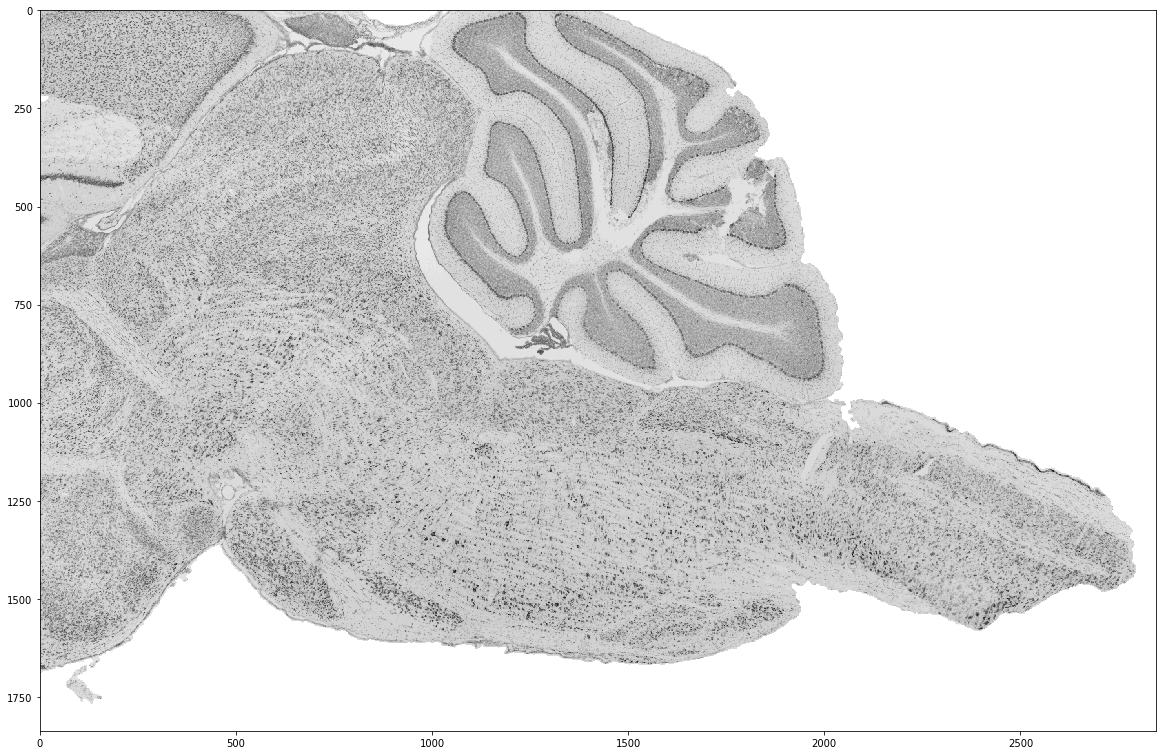

In [27]:
plt.figure(figsize=(20,20));
plt.imshow(img[::10, ::10], plt.cm.gray);

In [23]:
viz = DataManager.load_scoremap_viz_v2(stack='CHATM2', out_resolution='10.0um', 
                                       detector_id=799, prep_id=2, section=201, structure='6N')

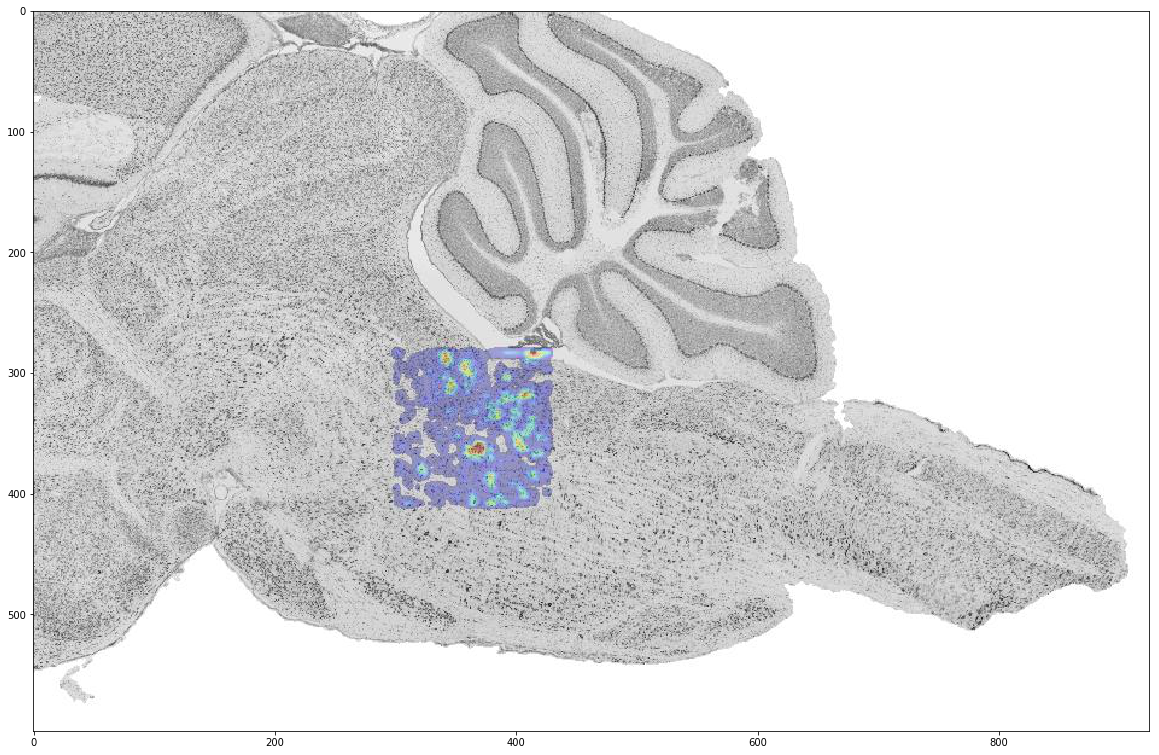

In [24]:
plt.figure(figsize=(20,20));
plt.imshow(viz);